In [1]:
import pandas as pd

In [2]:
# Import CSV files
hospital_info = pd.read_csv('hospital-info.csv')
not_yet_rated = pd.read_csv('not_yet_rated.csv')

# hospital_info

In [3]:
# hospital_info.columns.to_list()

In [4]:
from sklearn.model_selection import train_test_split

# Data preparation for model training

# Remove demographic and unnecessary columns
columns_to_drop = [
    'Provider ID',
    'Hospital Name',
    'Address',
    'City',
    'State',
    'ZIP Code',
    'County Name',
    'Phone Number',
    'Hospital Ownership',
    'Emergency Services',
    'rating_group'
]

In [5]:
# Save ID data for later
id_data = hospital_info[['Hospital Name', 'Address']].copy()

In [6]:
# Keep only necessary columns for machine learning
ml_data = hospital_info.drop(columns=columns_to_drop)

In [7]:
# Convert hospital ratings to binary classification
binary_classification = False

if binary_classification:
    ml_data['Hospital overall rating'] = ml_data['Hospital overall rating'].apply(lambda x: 1 if x > 3 else 0)

In [8]:
# Separate predictors and target variable
X = ml_data.drop(columns=['Hospital overall rating'])
y = ml_data['Hospital overall rating']

In [9]:
# Split the data into train and test sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Feature Selection

Top 10 most important features overview

In [34]:
import altair as alt
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display

# Train a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train, y_train)

# Get feature importances
importances = rf_classifier.feature_importances_

# Create a DataFrame with feature names and importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the top 10 features
print(feature_importances.head(10))

# Create a bar chart to visualize feature importances
chart = alt.Chart(feature_importances.head(10)).mark_bar().encode(
    x=alt.X('Importance:Q', axis=alt.Axis(title='Importance')),
    y=alt.Y('Feature:N', sort='-x', axis=alt.Axis(title='Feature')),
    tooltip = ['Feature', 'Importance']
).properties(
    title='Top 10 Feature Importances from Random Forest'
).interactive()

chart.save('feature_importances_bar_chart.json')

# Load the saved chart JSON
with open('feature_importances_bar_chart.json', 'r') as f:
    chart_json = f.read()

# Display the chart in Jupyter Notebook
display(alt.Chart.from_json(chart_json))

                                   Feature  Importance
18                READM_30_HOSP_WIDE_Score    0.064998
67              SAFETY_PSI_90_SAFETY_Score    0.051789
11                        MORT_30_PN_Score    0.028512
59  SAFETY_PSI_12_POSTOP_PULMEMB_DVT_Score    0.027529
3   Patient experience national comparison    0.026077
57                 EXP_H_STAR_RATING_Score    0.025648
62             SAFETY_PSI_15_ACC_LAC_Score    0.025387
2          Readmission national comparison    0.025167
10                        MORT_30_HF_Score    0.024180
53          EXP_H_COMP_7_STAR_RATING_Score    0.023746


alt.Chart(...)

### Checking which features and how many are needed by models 

Initializing RFECV with Logistic Regression...
Fitting RFECV with Logistic Regression...


/Users/Tobi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Tobi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Optimal number of features for Logistic Regression: 42
Best features for Logistic Regression: ['Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison', 'MORT_30_AMI_Score', 'MORT_30_CABG_Score', 'MORT_30_COPD_Score', 'MORT_30_HF_Score', 'MORT_30_PN_Score', 'MORT_30_STK_Score', 'READM_30_AMI_Score', 'READM_30_COPD_Score', 'READM_30_HOSP_WIDE_Score', 'READM_30_PN_Score', 'EFF_EDV_Score', 'EFF_STK_2_Score', 'EXP_H_CLEAN_STAR_RATING_Score', 'EXP_H_COMP_1_STAR_RATING_Score', 'EXP_H_COMP_2_STAR_RATING_Score', 'EXP_H_COMP_3_STAR_RATING_Score', 'EXP_H_COMP_4_STAR_RATING_Score', 'EXP_H_COMP_5_STAR_RATING_Score', 'EXP_H_COMP_6_STAR_RATING_Score', 'EXP_H_COMP_7_STAR_RATING_Score', 'EXP_H_HSP_RATING_STAR_RATING_Score', 'EXP_H_QUIET_STAR_RATING_Score', 'EXP_H_RECMND_ST

/Users/Tobi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


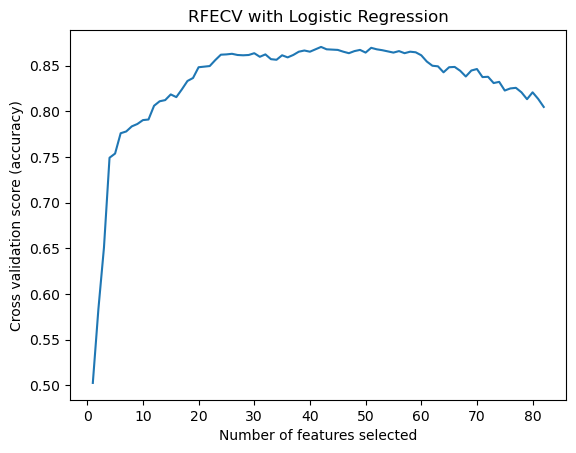

Initializing RFECV with Support Vector Machine...
Fitting RFECV with Support Vector Machine...
Optimal number of features for Support Vector Machine: 75
Best features for Support Vector Machine: ['Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison', 'MORT_30_AMI_Score', 'MORT_30_CABG_Score', 'MORT_30_COPD_Score', 'MORT_30_HF_Score', 'MORT_30_PN_Score', 'MORT_30_STK_Score', 'READM_30_AMI_Score', 'READM_30_CABG_Score', 'READM_30_COPD_Score', 'READM_30_HF_Score', 'READM_30_HIP_KNEE_Score', 'READM_30_HOSP_WIDE_Score', 'READM_30_PN_Score', 'READM_30_STK_Score', 'TIME_OP_21_Score', 'TIME_OP_5_Score', 'EFF_EDV_Score', 'EFF_IMM_2_Score', 'EFF_OP_20_Score', 'EFF_OP_22_Score', 'EFF_OP_4_Score', 'EFF_PC_01_Score', 'EFF_STK_1_Score', 'EFF_STK_10_Score', 'EFF_STK_2_

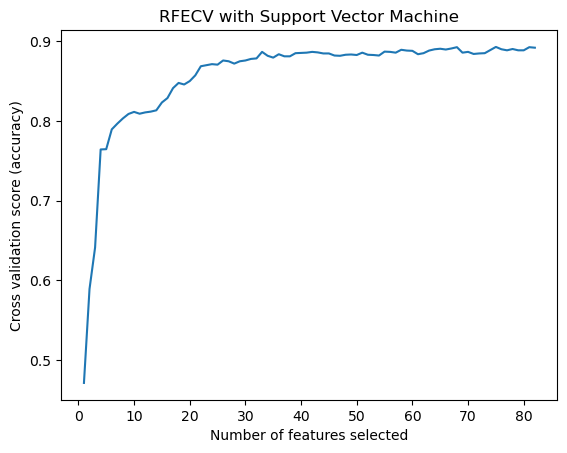

Initializing RFECV with Gradient Boosting...
Fitting RFECV with Gradient Boosting...
Optimal number of features for Gradient Boosting: 13
Best features for Gradient Boosting: ['Mortality national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'MORT_30_COPD_Score', 'MORT_30_HF_Score', 'MORT_30_PN_Score', 'READM_30_HOSP_WIDE_Score', 'EXP_H_COMP_1_STAR_RATING_Score', 'EXP_H_COMP_7_STAR_RATING_Score', 'EXP_H_HSP_RATING_STAR_RATING_Score', 'EXP_H_RECMND_STAR_RATING_Score', 'EXP_H_STAR_RATING_Score', 'SAFETY_PSI_90_SAFETY_Score']


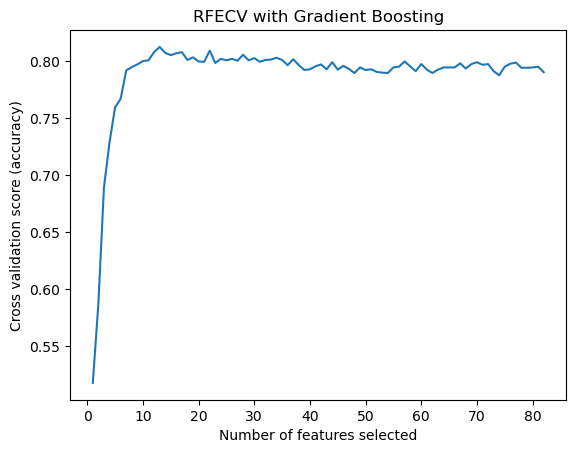

Initializing RFECV with Random Forest...
Fitting RFECV with Random Forest...
Optimal number of features for Random Forest: 20
Best features for Random Forest: ['Readmission national comparison', 'Patient experience national comparison', 'MORT_30_AMI_Score', 'MORT_30_COPD_Score', 'MORT_30_HF_Score', 'MORT_30_PN_Score', 'MORT_30_STK_Score', 'READM_30_HF_Score', 'READM_30_HOSP_WIDE_Score', 'READM_30_PN_Score', 'EFF_ED_1b_Score', 'EFF_ED_2b_Score', 'EXP_H_COMP_7_STAR_RATING_Score', 'EXP_H_HSP_RATING_STAR_RATING_Score', 'EXP_H_STAR_RATING_Score', 'SAFETY_PSI_12_POSTOP_PULMEMB_DVT_Score', 'SAFETY_PSI_15_ACC_LAC_Score', 'SAFETY_PSI_3_ULCER_Score', 'SAFETY_PSI_90_SAFETY_Score', 'MED_OP_10_Score']


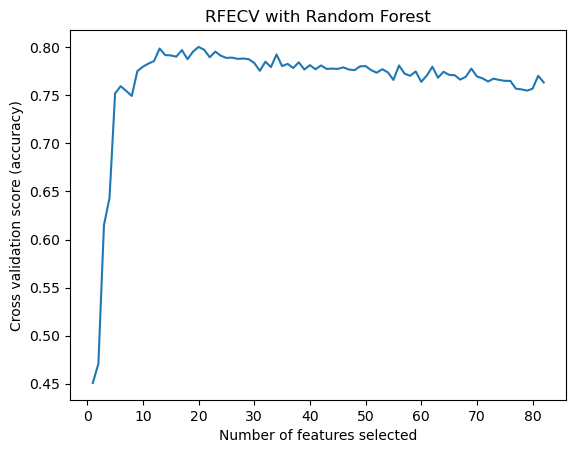

In [51]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Funktion zum Unterdrücken und wieder Aktivieren von Warnungen
class SuppressWarnings:
    def __enter__(self):
        warnings.filterwarnings('ignore', category=ConvergenceWarning)
        warnings.filterwarnings('ignore', category=UserWarning)
        warnings.filterwarnings('ignore', category=FutureWarning)
    
    def __exit__(self, exc_type, exc_value, traceback):
        warnings.filterwarnings('default', category=ConvergenceWarning)
        warnings.filterwarnings('default', category=UserWarning)
        warnings.filterwarnings('default', category=FutureWarning)

classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=0, n_jobs=-1),
    'Support Vector Machine': SVC(kernel='linear', random_state=0),  # SVC unterstützt n_jobs nicht
    'Gradient Boosting': GradientBoostingClassifier(random_state=0),  # Gradient Boosting unterstützt n_jobs nicht
    'Random Forest': RandomForestClassifier(random_state=0, n_jobs=-1),
}

def train_rfecv(name, clf, X, y):
    with SuppressWarnings():
        print(f"Initializing RFECV with {name}...")
        rfecv = RFECV(
            estimator=clf,
            step=1,
            cv=StratifiedKFold(5),
            scoring='accuracy',
            n_jobs=-1  # RFECV unterstützt n_jobs
        )

        print(f"Fitting RFECV with {name}...")
        rfecv.fit(X, y)

        optimal_n_features = rfecv.n_features_
        best_features = X.columns[rfecv.support_]

        print(f"Optimal number of features for {name}: {optimal_n_features}")
        print(f"Best features for {name}: {list(best_features)}")

        # Plotting the results of the cross-validation
        plt.figure()
        plt.title(f"RFECV with {name}")
        plt.xlabel("Number of features selected")
        plt.ylabel("Cross validation score (accuracy)")
        plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
        plt.show()

with SuppressWarnings():
    for name, clf in classifiers.items():
        train_rfecv(name, clf, X, y)

# Determine Scaler

Using "Logistic Regression",
"Random Forest Classifier",
"Decision Tree Classifier" -- for MinMaxScaler and StandardScaler

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

scaler_1 = StandardScaler()


# Creating different pipelines for each model
pipeline_log_reg_1 = make_pipeline(scaler_1, LogisticRegression())
pipeline_rf_1 = make_pipeline(scaler_1, RandomForestClassifier())
pipeline_dt_1 = make_pipeline(scaler_1, DecisionTreeClassifier())


In [14]:
def print_evaluation_results(model_name, train_acc, test_acc, conf_matrix, class_report):
    print(f"--- {model_name} ---")
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    print("\n")

In [38]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# For each pipeline/model, predict and calculate metrics 
pipeline_1 = {
    "Logistic Regression 1": pipeline_log_reg_1,
    "Random Forest Classifier 1": pipeline_rf_1,
    "Decision Tree Classifier 1": pipeline_dt_1
}

pipelines = [pipeline_1]

# Loop through each model/pipeline
for pipelines in pipelines: 
    for model_name, pipeline in pipelines.items():
        # Train the model
        pipeline.fit(X_train, y_train)
    
        # Predict the labels (on both train and test sets)
        y_train_pred = pipeline.predict(X_train)
        y_test_pred = pipeline.predict(X_test)
    
        # Calculate the accuracy scores
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
    
        # Calculate confusion matrix
        conf_matrix = confusion_matrix(y_test, y_test_pred)
    
        # Calculate the classification report
        class_report = classification_report(y_test, y_test_pred)
    
        # Call the function to print the results
        print_evaluation_results(model_name, train_acc, test_acc, conf_matrix, class_report)

--- Logistic Regression 1 ---
Train Accuracy: 0.9575
Test Accuracy: 0.8965
Confusion Matrix:
[[ 30  10   0   0   0]
 [  6 173  20   0   0]
 [  0  14 393   9   0]
 [  0   0  25 209   8]
 [  0   0   0   3  18]]
Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.75      0.79        40
           2       0.88      0.87      0.87       199
           3       0.90      0.94      0.92       416
           4       0.95      0.86      0.90       242
           5       0.69      0.86      0.77        21

    accuracy                           0.90       918
   macro avg       0.85      0.86      0.85       918
weighted avg       0.90      0.90      0.90       918



--- Random Forest Classifier 1 ---
Train Accuracy: 1.0000
Test Accuracy: 0.7669
Confusion Matrix:
[[ 10  30   0   0   0]
 [  0 144  55   0   0]
 [  0  22 382  12   0]
 [  0   0  84 158   0]
 [  0   0   0  11  10]]
Classification Report:
              precision    recall  f1-sc

Selected Scaler: StandardScaler

# Define models and their hyper parameters
Create list of hyperparameters

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, ParameterGrid
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

# Define preprocessor
preprocessor = StandardScaler()

# Define models and their respective parameter grids
models_and_params = [
    ('LogisticRegression', LogisticRegression(), {
        'regressor__penalty': ['l2'],
        'regressor__C': np.logspace(-4, 4, 20),
        'regressor__solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
        'regressor__max_iter': [100, 1000, 2500, 5000]
    }),
    ('LogisticRegression (l1)', LogisticRegression(solver='liblinear'), {
        'regressor__penalty': ['l1'],
        'regressor__C': np.logspace(-4, 4, 20),
        'regressor__max_iter': [100, 1000, 2500, 5000]
    }),
    ('LogisticRegression (elasticnet)', LogisticRegression(solver='saga'), {
        'regressor__penalty': ['elasticnet'],
        'regressor__C': np.logspace(-4, 4, 20),
        'regressor__l1_ratio': np.linspace(0, 1, 10),
        'regressor__max_iter': [100, 1000, 2500, 5000]
    }),
    ('RandomForestClassifier', RandomForestClassifier(), {
        'regressor__n_estimators': [10, 50, 100],
        'regressor__max_depth': [4, 6, 8, 10],
        'regressor__criterion': ['gini', 'entropy']
    }),
    ('DecisionTreeClassifier', DecisionTreeClassifier(), {
        'regressor__criterion': ['gini', 'entropy'],
        'regressor__max_depth': [2, 4, 6, 8, 10]
    }),
    ('SVR', SVR(), {
        'regressor__C': [1, 10, 100],
        'regressor__epsilon': [0.1, 0.2, 0.5]
    }),
    ('Ridge', Ridge(), {
        'regressor__alpha': [0.1, 1.0, 10.0]
    }),
    ('Lasso', Lasso(), {
        'regressor__alpha': [0.1, 1.0, 10.0]
    }),
    ('RandomForest', RandomForestRegressor(), {
        'regressor__n_estimators': [10, 50, 100],
        'regressor__max_depth': [None, 10, 20]
    }),
    ('XGBoost', XGBRegressor(), {
        'regressor__n_estimators': [100, 200],
        'regressor__learning_rate': [0.01, 0.05, 0.1]
    }),
    ('LightGBM', LGBMRegressor(), {
        'regressor__n_estimators': [100, 200],
        'regressor__learning_rate': [0.01, 0.05, 0.1]
    }),
]

## Based on above, run a Grid Search to find the best parameters

GridSearch for models and param_grid above

In [ ]:
results = []

# Loop through models and perform grid search
for name, model, param_grid in models_and_params:
    print(f"Optimizing {name}...")

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Initialize the parameter grid
    param_list = list(ParameterGrid(param_grid))

    best_params = None
    best_score = float('inf')

    for params in param_list:
        try:
            pipeline.set_params(**params)
            scores = cross_val_score(pipeline, X_train, y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
            mean_score = -scores.mean()

            if mean_score < best_score:
                best_score = mean_score
                best_params = params
        except Exception as e:
            print(f"Error with params {params}: {e}")

    # Train the best model on the full training data
    if best_params is not None:
        pipeline.set_params(**best_params)
        pipeline.fit(X_train, y_train)

        y_pred = pipeline.predict(X_test)
        test_mse = mean_squared_error(y_test, y_pred)

        results.append({
            'model': name,
            'best_params': best_params,
            'cv_mse': best_score,
            'test_mse': test_mse
        })

# Convert results to DataFrame and sort by test MSE
results_df = pd.DataFrame(results).sort_values(by='test_mse')
# Display the final result
print(results_df)

In [41]:
results_df

,model,best_params,cv_mse,test_mse
2,LogisticRegression (elasticnet),"{'regressor__C': 0.615848211066026, 'regressor...",0.106122,0.087146
0,LogisticRegression,"{'regressor__C': 11.288378916846883, 'regresso...",0.123886,0.101307
6,Ridge,{'regressor__alpha': 10.0},0.103729,0.103408
10,LightGBM,"{'regressor__learning_rate': 0.05, 'regressor_...",0.120138,0.108308
9,XGBoost,"{'regressor__learning_rate': 0.05, 'regressor_...",0.127832,0.113554
8,RandomForest,"{'regressor__max_depth': 20, 'regressor__n_est...",0.156442,0.142428
5,SVR,"{'regressor__C': 1, 'regressor__epsilon': 0.2}",0.146549,0.142809
7,Lasso,{'regressor__alpha': 0.1},0.167157,0.160888
3,RandomForestClassifier,"{'regressor__criterion': 'entropy', 'regressor...",0.249652,0.240741
1,LogisticRegression (l1),"{'regressor__C': 4.281332398719396, 'regressor...",0.264604,0.242919


# First best_params


In [16]:
best_params = {
    "LogisticRegression (elasticnet)": {
        "regressor__C": 0.615848211066026,
        "regressor__l1_ratio": 0.6666666666666666,
        "regressor__max_iter": 100,
        "regressor__penalty": "elasticnet"
    },
    "LogisticRegression": {
        "regressor__C": 1.623776739188721,
        "regressor__max_iter": 100,
        "regressor__penalty": "l2",
        "regressor__solver": "lbfgs"
    },
    "LightGBM": {
        "regressor__learning_rate": 0.05,
        "regressor__n_estimators": 200
    },
    "XGBoost": {
        "regressor__learning_rate": 0.05,
        "regressor__n_estimators": 200
    },
    "RandomForest": {
        "regressor__max_depth": 20,
        "regressor__n_estimators": 100
    },
    "Ridge": {
        "regressor__alpha": 10.0
    },
    "LogisticRegression (l1)": {
        "regressor__C": 0.615848211066026,
        "regressor__max_iter": 100,
        "regressor__penalty": "l1"
    },
    "DecisionTreeClassifier": {
        "regressor__criterion": "entropy",
        "regressor__max_depth": 4
    },
    "Lasso": {
        "regressor__alpha": 0.1
    },
    "RandomForestClassifier": {
        "regressor__criterion": "gini",
        "regressor__max_depth": 10,
        "regressor__n_estimators": 50
    },
    "SVR": {
        "regressor__C": 1,
        "regressor__epsilon": 0.1
    }
}

In [19]:
best_params = {
    "LogisticRegression (elasticnet)": {
        "regressor__C": 0.83914,
        "regressor__l1_ratio": 0.0334,
        "regressor__max_iter": 1954,
        "regressor__solver": "saga",
        "regressor__penalty": "l1"
    },
    "LogisticRegression": {
    "regressor__penalty": "l2",
    "regressor__C": 302.5922084361755,
    "regressor__solver": "lbfgs",
    "regressor__max_iter": 100
    },
    "LightGBM": {
    "regressor__n_estimators": 73,
    "regressor__learning_rate": 0.598051462131909,
    "regressor__num_leaves": 6,
    "regressor__min_child_samples": 1,
    "regressor__subsample": 0.22828096007057125,
    "regressor__colsample_bytree": 0.937954695493283
    },
    "XGBoost": {
        "regressor__learning_rate": 0.05,
        "regressor__n_estimators": 200
    },
    "RandomForest": {
        "regressor__max_depth": 20,
        "regressor__n_estimators": 100
    },
    "Ridge": {
        "regressor__alpha": 10.0
    },
    "LogisticRegression (l1)": {
        "regressor__C": 0.615848211066026,
        "regressor__max_iter": 100,
        "regressor__penalty": "l1"
    },
    "DecisionTreeClassifier": {
        "regressor__criterion": "entropy",
        "regressor__max_depth": 4
    },
    "Lasso": {
        "regressor__alpha": 0.1
    },
    "RandomForestClassifier": {
        "regressor__criterion": "gini",
        "regressor__max_depth": 10,
        "regressor__n_estimators": 50
    },
    "SVR": {
        "regressor__C": 1,
        "regressor__epsilon": 0.1
    }}

### The best_params dictionary contains the best hyperparameters for each model after the grid search. The next step is to train and evaluate these models with the best parameters

In [49]:
feature_selection = {
'logistic_regression_features': [
        'Mortality national comparison', 'Safety of care national comparison',
        'Readmission national comparison', 'Patient experience national comparison',
        'Effectiveness of care national comparison', 'Timeliness of care national comparison',
        'Efficient use of medical imaging national comparison', 'MORT_30_AMI_Score',
        'MORT_30_CABG_Score', 'MORT_30_COPD_Score', 'MORT_30_HF_Score',
        'MORT_30_PN_Score', 'MORT_30_STK_Score', 'READM_30_AMI_Score',
        'READM_30_COPD_Score', 'READM_30_HOSP_WIDE_Score', 'READM_30_PN_Score',
        'EFF_EDV_Score', 'EFF_STK_2_Score', 'EXP_H_CLEAN_STAR_RATING_Score',
        'EXP_H_COMP_1_STAR_RATING_Score', 'EXP_H_COMP_2_STAR_RATING_Score',
        'EXP_H_COMP_3_STAR_RATING_Score', 'EXP_H_COMP_4_STAR_RATING_Score',
        'EXP_H_COMP_5_STAR_RATING_Score', 'EXP_H_COMP_6_STAR_RATING_Score',
        'EXP_H_COMP_7_STAR_RATING_Score', 'EXP_H_HSP_RATING_STAR_RATING_Score',
        'EXP_H_QUIET_STAR_RATING_Score', 'EXP_H_RECMND_STAR_RATING_Score',
        'EXP_H_STAR_RATING_Score', 'SAFETY_COMP_HIP_KNEE_Score',
        'SAFETY_PSI_12_POSTOP_PULMEMB_DVT_Score', 'SAFETY_PSI_15_ACC_LAC_Score',
        'SAFETY_PSI_3_ULCER_Score', 'SAFETY_PSI_6_IAT_PTX_Score',
        'SAFETY_PSI_7_CVCBI_Score', 'SAFETY_PSI_90_SAFETY_Score',
        'SAFETY_HAI_1_SIR_Score', 'SAFETY_HAI_2_SIR_Score',
        'SAFETY_HAI_2a_SIR_Score', 'SAFETY_HAI_6_SIR_Score'
    ],
'svm_features': [
    'Mortality national comparison', 'Safety of care national comparison',
    'Readmission national comparison', 'Patient experience national comparison',
    'Effectiveness of care national comparison', 'Timeliness of care national comparison',
    'Efficient use of medical imaging national comparison', 'MORT_30_AMI_Score',
    'MORT_30_CABG_Score', 'MORT_30_COPD_Score', 'MORT_30_HF_Score',
    'MORT_30_PN_Score', 'MORT_30_STK_Score', 'READM_30_AMI_Score',
    'READM_30_CABG_Score', 'READM_30_COPD_Score', 'READM_30_HF_Score',
    'READM_30_HIP_KNEE_Score', 'READM_30_HOSP_WIDE_Score',
    'READM_30_PN_Score', 'READM_30_STK_Score', 'TIME_OP_21_Score',
    'TIME_OP_5_Score', 'EFF_EDV_Score', 'EFF_IMM_2_Score',
    'EFF_OP_20_Score', 'EFF_OP_22_Score', 'EFF_OP_4_Score',
    'EFF_PC_01_Score', 'EFF_STK_1_Score', 'EFF_STK_10_Score',
    'EFF_STK_2_Score', 'EFF_STK_4_Score', 'EFF_STK_5_Score',
    'EFF_STK_6_Score', 'EFF_VTE_1_Score', 'EFF_VTE_2_Score',
    'EFF_VTE_3_Score', 'EFF_VTE_5_Score', 'EFF_VTE_6_Score',
    'EXP_H_CLEAN_STAR_RATING_Score', 'EXP_H_COMP_1_STAR_RATING_Score',
    'EXP_H_COMP_2_STAR_RATING_Score', 'EXP_H_COMP_3_STAR_RATING_Score',
    'EXP_H_COMP_4_STAR_RATING_Score', 'EXP_H_COMP_5_STAR_RATING_Score',
    'EXP_H_COMP_6_STAR_RATING_Score', 'EXP_H_COMP_7_STAR_RATING_Score',
    'EXP_H_HSP_RATING_STAR_RATING_Score', 'EXP_H_QUIET_STAR_RATING_Score',
    'EXP_H_RECMND_STAR_RATING_Score', 'EXP_H_STAR_RATING_Score',
    'SAFETY_COMP_HIP_KNEE_Score', 'SAFETY_PSI_12_POSTOP_PULMEMB_DVT_Score',
    'SAFETY_PSI_13_POST_SEPSIS_Score', 'SAFETY_PSI_14_POSTOP_DEHIS_Score',
    'SAFETY_PSI_15_ACC_LAC_Score', 'SAFETY_PSI_3_ULCER_Score',
    'SAFETY_PSI_6_IAT_PTX_Score', 'SAFETY_PSI_7_CVCBI_Score',
    'SAFETY_PSI_90_SAFETY_Score', 'SAFETY_HAI_1_SIR_Score',
    'SAFETY_HAI_1a_SIR_Score', 'SAFETY_HAI_2_SIR_Score',
    'SAFETY_HAI_2a_SIR_Score', 'SAFETY_HAI_3_SIR_Score',
    'SAFETY_HAI_4_SIR_Score', 'SAFETY_HAI_5_SIR_Score',
    'SAFETY_HAI_6_SIR_Score', 'MED_OP_10_Score', 'MED_OP_11_Score',
    'MED_OP_13_Score', 'MED_OP_14_Score', 'MED_OP_8_Score',
    'MED_OP_9_Score'
],
'gradient_boosting_features': [
    'Mortality national comparison', 'Readmission national comparison',
    'Patient experience national comparison', 'MORT_30_COPD_Score',
    'MORT_30_HF_Score', 'MORT_30_PN_Score', 'READM_30_HOSP_WIDE_Score',
    'EXP_H_COMP_1_STAR_RATING_Score', 'EXP_H_COMP_7_STAR_RATING_Score',
    'EXP_H_HSP_RATING_STAR_RATING_Score', 'EXP_H_RECMND_STAR_RATING_Score',
    'EXP_H_STAR_RATING_Score', 'SAFETY_PSI_90_SAFETY_Score'
],
'random_forest_features': [
    'Readmission national comparison', 'Patient experience national comparison',
    'MORT_30_AMI_Score', 'MORT_30_COPD_Score', 'MORT_30_HF_Score',
    'MORT_30_PN_Score', 'MORT_30_STK_Score', 'READM_30_HF_Score',
    'READM_30_HOSP_WIDE_Score', 'READM_30_PN_Score', 'EFF_ED_1b_Score',
    'EFF_ED_2b_Score', 'EXP_H_COMP_7_STAR_RATING_Score',
    'EXP_H_HSP_RATING_STAR_RATING_Score', 'EXP_H_STAR_RATING_Score',
    'SAFETY_PSI_12_POSTOP_PULMEMB_DVT_Score', 'SAFETY_PSI_15_ACC_LAC_Score',
    'SAFETY_PSI_3_ULCER_Score', 'SAFETY_PSI_90_SAFETY_Score',
    'MED_OP_10_Score'
]
}

In [21]:
# Function to print evaluation results for classification models
def print_classification_results(model_name, train_acc, test_acc, conf_matrix, class_report):
    print(f"--- {model_name} ---")
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    print("\n")

In [22]:
# Function to print evaluation results for regression models
def print_regression_results(model_name, train_mse, test_mse):
    print(f"--- {model_name} ---")
    print(f"Train MSE: {train_mse:.4f}")
    print(f"Test MSE: {test_mse:.4f}")
    print("\n")

In [23]:
def clean_params(params):
    # Entfernt 'regressor__' Präfix aus den Parametern
    return {key.replace("regressor__", ""): value for key, value in params.items()}

In [24]:
def evaluate_model(pipeline, params, X_train, y_train, X_test, y_test, is_classification=True):
    pipeline.set_params(**{f'regressor__{key}': value for key, value in params.items()})
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    
    if is_classification:
        return accuracy_score(y_test, predictions)
    else:
        return mean_squared_error(y_test, predictions)

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, ParameterGrid
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score
import joblib
import warnings
from sklearn.exceptions import ConvergenceWarning

# Set up warnings to be ignored
warnings.filterwarnings("ignore", category=UserWarning)

results = []

# Loop through models and perform evaluation
for model_name, params in best_params.items():
    cleaned_params = clean_params(params)
    for feature_key, selected_features in feature_selection.items():
        # Ensure X_train_selected and X_test_selected are defined
        X_train_selected = X_train[selected_features]
        X_test_selected = X_test[selected_features]
        
        if model_name.startswith("LogisticRegression (elasticnet)"):
            penalty = 'elasticnet'
            cleaned_params.pop('penalty', None)
            cleaned_params.pop('solver', None)  # Remove solver if it exists in cleaned_params
            model = LogisticRegression(
                penalty=penalty,
                solver='saga',
                **cleaned_params
            )
            is_classification = True
        elif model_name.startswith("LogisticRegression"):
            penalty = cleaned_params.pop('penalty', 'l2')
            solver = cleaned_params.pop('solver', 'lbfgs')  # Remove solver if it exists in cleaned_params
            if penalty == 'l1' and solver != 'liblinear':
                solver = 'liblinear'
            model = LogisticRegression(
                penalty=penalty,
                solver=solver,
                **cleaned_params
            )
            is_classification = True
        elif model_name == "LightGBM":
            model = LGBMRegressor(**cleaned_params)
            is_classification = False
        elif model_name == "XGBoost":
            model = XGBRegressor(**cleaned_params)
            is_classification = False
        elif model_name == "RandomForest":
            model = RandomForestRegressor(**cleaned_params)
            is_classification = False
        elif model_name == "Ridge":
            model = Ridge(**cleaned_params)
            is_classification = False
        elif model_name == "Lasso":
            model = Lasso(**cleaned_params)
            is_classification = False
        elif model_name == "DecisionTreeClassifier":
            model = DecisionTreeClassifier(**cleaned_params)
            is_classification = True
        elif model_name == "RandomForestClassifier":
            model = RandomForestClassifier(**cleaned_params)
            is_classification = True
        elif model_name == "SVR":
            model = SVR(**cleaned_params)
            is_classification = False
        else:
            raise ValueError(f"Model {model_name} is not recognized.")
        
        # Evaluate the model using the pipeline
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('regressor', model)
        ])
        score = evaluate_model(pipeline, cleaned_params, X_train, y_train, X_test, y_test, is_classification)
        results.append({"Model": model_name, 'feature_set': feature_key, "Score": score})
        print(f"{model_name}, {feature_key} Score: {score}")


# Convert results to DataFrame and sort by test MSE
results_df = pd.DataFrame(results)
# Display the final result
print(results_df)

LogisticRegression (elasticnet), logistic_regression_features Score: 0.8997821350762527
LogisticRegression (elasticnet), svm_features Score: 0.8997821350762527
LogisticRegression (elasticnet), gradient_boosting_features Score: 0.8997821350762527
LogisticRegression (elasticnet), random_forest_features Score: 0.8997821350762527
LogisticRegression, logistic_regression_features Score: 0.8856209150326797
LogisticRegression, svm_features Score: 0.8856209150326797
LogisticRegression, gradient_boosting_features Score: 0.8856209150326797
LogisticRegression, random_forest_features Score: 0.8856209150326797
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000924 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6809
[LightGBM] [Info] Number of data points in the train set: 2139, number of used features: 82
[LightGBM] [Info] Start training from score 3.034596
LightGBM, logistic_regression_features Score: 0.1457856

In [29]:
results_df

,Model,feature_set,Score
0,LogisticRegression (elasticnet),logistic_regression_features,0.899782
1,LogisticRegression (elasticnet),svm_features,0.899782
2,LogisticRegression (elasticnet),gradient_boosting_features,0.899782
3,LogisticRegression (elasticnet),random_forest_features,0.899782
4,LogisticRegression,logistic_regression_features,0.885621
5,LogisticRegression,svm_features,0.885621
6,LogisticRegression,gradient_boosting_features,0.885621
7,LogisticRegression,random_forest_features,0.885621
8,LightGBM,logistic_regression_features,0.145786
9,LightGBM,svm_features,0.145786


In [ ]:
# Save the best model
best_model_name = results_df.iloc[0]['model']
best_model_params = results_df.iloc[0]['best_params']

# Initialize the best model
if best_model_name in ["LightGBM", "XGBoost", "RandomForest", "Ridge", "Lasso", "SVR"]:
    if best_model_name == "LightGBM":
        best_model = LGBMRegressor()
    elif best_model_name == "XGBoost":
        best_model = XGBRegressor()
    elif best_model_name == "RandomForest":
        best_model = RandomForestRegressor()
    elif best_model_name == "Ridge":
        best_model = Ridge()
    elif best_model_name == "Lasso":
        best_model = Lasso()
    elif best_model_name == "SVR":
        best_model = SVR()
else:
    if best_model_name.startswith("LogisticRegression"):
        if "elasticnet" in best_model_name:
            best_model = LogisticRegression(solver='saga', penalty='elasticnet')
        elif "l1" in best_model_name:
            best_model = LogisticRegression(solver='liblinear', penalty='l1')
        else:
            best_model = LogisticRegression(solver='lbfgs', penalty='l2')
    elif best_model_name == "RandomForestClassifier":
        best_model = RandomForestClassifier()
    elif best_model_name == "DecisionTreeClassifier":
        best_model = DecisionTreeClassifier()

# Set the best parameters
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', best_model)
])
pipeline.set_params(**best_model_params)

# Train the best model on the full training data
pipeline.fit(X_train_selected, y_train)

# Save the trained model
joblib.dump(pipeline, 'best_model.pkl')

In [53]:
# Selected features as per the trained model
selected_features = ['Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison',
                     'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison',
                     'Efficient use of medical imaging national comparison', 'MORT_30_AMI_Score', 'MORT_30_CABG_Score', 'MORT_30_COPD_Score',
                     'MORT_30_HF_Score', 'MORT_30_PN_Score', 'MORT_30_STK_Score', 'READM_30_AMI_Score', 'READM_30_CABG_Score', 'READM_30_COPD_Score',
                     'READM_30_HF_Score', 'READM_30_HIP_KNEE_Score', 'READM_30_HOSP_WIDE_Score', 'READM_30_PN_Score', 'READM_30_STK_Score', 'EFF_EDV_Score',
                     'EFF_OP_4_Score', 'EFF_STK_2_Score', 'EFF_VTE_1_Score', 'EFF_VTE_2_Score', 'EFF_VTE_6_Score', 'EXP_H_CLEAN_STAR_RATING_Score',
                     'EXP_H_COMP_1_STAR_RATING_Score', 'EXP_H_COMP_2_STAR_RATING_Score', 'EXP_H_COMP_3_STAR_RATING_Score', 'EXP_H_COMP_4_STAR_RATING_Score',
                     'EXP_H_COMP_5_STAR_RATING_Score', 'EXP_H_COMP_6_STAR_RATING_Score', 'EXP_H_COMP_7_STAR_RATING_Score', 'EXP_H_HSP_RATING_STAR_RATING_Score',
                     'EXP_H_QUIET_STAR_RATING_Score', 'EXP_H_RECMND_STAR_RATING_Score', 'EXP_H_STAR_RATING_Score', 'SAFETY_COMP_HIP_KNEE_Score',
                     'SAFETY_PSI_12_POSTOP_PULMEMB_DVT_Score', 'SAFETY_PSI_13_POST_SEPSIS_Score', 'SAFETY_PSI_14_POSTOP_DEHIS_Score', 'SAFETY_PSI_15_ACC_LAC_Score',
                     'SAFETY_PSI_3_ULCER_Score', 'SAFETY_PSI_6_IAT_PTX_Score', 'SAFETY_PSI_7_CVCBI_Score', 'SAFETY_PSI_90_SAFETY_Score', 'SAFETY_HAI_1_SIR_Score',
                     'SAFETY_HAI_1a_SIR_Score', 'SAFETY_HAI_2_SIR_Score', 'SAFETY_HAI_2a_SIR_Score', 'SAFETY_HAI_3_SIR_Score', 'SAFETY_HAI_4_SIR_Score', 
                     'SAFETY_HAI_6_SIR_Score']

# Ensure that 'not_yet_rated' contains all the selected features
not_yet_rated_selected = not_yet_rated[selected_features]

# Load the best model
best_model = joblib.load('best_model.pkl')

# Make predictions
predictions = best_model.predict(not_yet_rated_selected)

# Add predictions to the DataFrame
not_yet_rated['Predicted Hospital overall rating'] = predictions

# Display the first few rows with predictions
print(not_yet_rated[['Provider ID', 'Predicted Hospital overall rating']])

   Provider ID  Predicted Hospital overall rating
0       520139                                  4
1       520189                                  4
2       370029                                  3
3       370032                                  3
4       370036                                  3
5       370037                                  3


## Recommendation for hospital to increase rating, eg hospital with provider ID 370032 from 3 to >3

In [54]:
import pandas as pd
import numpy as np

# Load the best model and feature importances
best_model = joblib.load('best_model.pkl')

# Ensure the model is a tree-based model or has feature_importances_ attribute
if hasattr(best_model.named_steps['regressor'], 'feature_importances_'):
    importances = best_model.named_steps['regressor'].feature_importances_
    feature_names = selected_features
elif hasattr(best_model.named_steps['regressor'], 'coef_'):
    importances = np.abs(best_model.named_steps['regressor'].coef_)[0]
    feature_names = selected_features
else:
    raise ValueError("Model does not have feature importances or coefficients attribute")

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Function to generate recommendations for a hospital
def generate_recommendations(hospital_id, not_yet_rated, feature_importances, top_n=5):
    # Get the top N important features
    top_features = feature_importances.head(top_n)['Feature'].values
    
    # Get the data for the specific hospital
    hospital_data = not_yet_rated[not_yet_rated['Provider ID'] == hospital_id]
    
    # Compare with hospitals having higher ratings
    higher_rated_hospitals = not_yet_rated[not_yet_rated['Predicted Hospital overall rating'] >= 4]
    
    recommendations = {}
    
    for feature in top_features:
        # Get the mean value of the feature for higher-rated hospitals
        mean_value = higher_rated_hospitals[feature].mean()
        
        # Get the hospital's current value for the feature
        current_value = hospital_data[feature].values[0]
        
        # Generate recommendation if the current value is lower than the mean value
        if current_value < mean_value:
            recommendations[feature] = {
                'current_value': current_value,
                'recommended_value': mean_value,
                'difference': mean_value - current_value
            }
    
    return recommendations

# Example: Generate recommendations for a specific hospital
hospital_id = 370037  # Example hospital ID
recommendations = generate_recommendations(hospital_id, not_yet_rated, feature_importances)

# Print recommendations
print(f"Recommendations for Hospital ID {hospital_id}:")
for feature, details in recommendations.items():
    print(f"- {feature}: Increase from {details['current_value']} to {details['recommended_value']} (Difference: {details['difference']:.2f})")


Recommendations for Hospital ID 370037:
- MORT_30_PN_Score: Increase from -15.4 to -15.100000000000001 (Difference: 0.30)
- SAFETY_PSI_12_POSTOP_PULMEMB_DVT_Score: Increase from -6.76 to -4.295 (Difference: 2.46)


# Cut Off

In [44]:
results = []

# Iterate through best_params and evaluate each model
for model_name, params in best_params.items():
    if model_name.startswith("LogisticRegression"):
        if "elasticnet" in model_name:
            model = LogisticRegression(solver='saga', penalty='elasticnet')
        elif "l1" in model_name:
            model = LogisticRegression(solver='liblinear', penalty='l1')
        else:
            model = LogisticRegression(solver='lbfgs', penalty='l2')
    elif model_name == "LightGBM":
        model = LGBMRegressor()
    elif model_name == "XGBoost":
        model = XGBRegressor()
    elif model_name == "RandomForest":
        model = RandomForestRegressor()
    elif model_name == "Ridge":
        model = Ridge()
    elif model_name == "Lasso":
        model = Lasso()
    elif model_name == "DecisionTreeClassifier":
        model = DecisionTreeClassifier()
    elif model_name == "RandomForestClassifier":
        model = RandomForestClassifier()
    elif model_name == "SVR":
        model = SVR()
    else:
        raise ValueError(f"Model {model_name} is not recognized.")
    
    score = evaluate_model(model, params, X_train, y_train, X_test, y_test)
    results.append({"Model": model_name, "Score": score})
    print(f"{model_name} Score: {score}")

# Ergebnisse in DataFrame umwandeln
results_df2 = pd.DataFrame(results)

# DataFrame anzeigen
print(results_df2)

/Users/kris/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression (elasticnet) Score: 0.10893246187363835
LogisticRegression Score: 0.10130718954248366
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6809
[LightGBM] [Info] Number of data points in the train set: 2139, number of used features: 82
[LightGBM] [Info] Start training from score 3.034596
LightGBM Score: 0.10830776515015086
XGBoost Score: 0.11355408394486352
RandomForest Score: 0.1422138727878421
Ridge Score: 0.10340820304044407
LogisticRegression (l1) Score: 0.2440087145969499
DecisionTreeClassifier Score: 0.3812636165577342
Lasso Score: 0.16088831031424194
RandomForestClassifier Score: 0.2625272331154684
SVR Score: 0.1432296670521
                              Model     Score
0   LogisticRegression (elasticnet)  0.108932
1                LogisticRegression  0.101307
2

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001424 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6485
[LightGBM] [Info] Number of data points in the train set: 1711, number of used features: 82
[LightGBM] [Info] Start training from score 3.042665
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000983 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6502
[LightGBM] [Info] Number of data points in the train set: 1711, number of used features: 82
[LightGBM] [Info] Start training from score 3.041496
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002565 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6468
[LightGBM] [Info] Number of data points in the train set: 

In [ ]:
results_df2

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the results with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Model', data=results_df2, hue='Model', dodge=False, palette='viridis', legend=False)
plt.xlabel('Mean Squared Error')
plt.title('Model Performance Comparison')
plt.show()

In [ ]:
results = pd.concat([id_data, results], axis=1)

# GA

In [10]:
random_forest_features = [
    'Readmission national comparison', 'Patient experience national comparison',
    'MORT_30_AMI_Score', 'MORT_30_COPD_Score', 'MORT_30_HF_Score',
    'MORT_30_PN_Score', 'MORT_30_STK_Score', 'READM_30_HF_Score',
    'READM_30_HOSP_WIDE_Score', 'READM_30_PN_Score', 'EFF_ED_1b_Score',
    'EFF_ED_2b_Score', 'EXP_H_COMP_7_STAR_RATING_Score',
    'EXP_H_HSP_RATING_STAR_RATING_Score', 'EXP_H_STAR_RATING_Score',
    'SAFETY_PSI_12_POSTOP_PULMEMB_DVT_Score', 'SAFETY_PSI_15_ACC_LAC_Score',
    'SAFETY_PSI_3_ULCER_Score', 'SAFETY_PSI_90_SAFETY_Score',
    'MED_OP_10_Score']

svm_features = [
    'Mortality national comparison', 'Safety of care national comparison',
    'Readmission national comparison', 'Patient experience national comparison',
    'Effectiveness of care national comparison', 'Timeliness of care national comparison',
    'Efficient use of medical imaging national comparison', 'MORT_30_AMI_Score',
    'MORT_30_CABG_Score', 'MORT_30_COPD_Score', 'MORT_30_HF_Score',
    'MORT_30_PN_Score', 'MORT_30_STK_Score', 'READM_30_AMI_Score',
    'READM_30_CABG_Score', 'READM_30_COPD_Score', 'READM_30_HF_Score',
    'READM_30_HIP_KNEE_Score', 'READM_30_HOSP_WIDE_Score',
    'READM_30_PN_Score', 'READM_30_STK_Score', 'TIME_OP_21_Score',
    'TIME_OP_5_Score', 'EFF_EDV_Score', 'EFF_IMM_2_Score',
    'EFF_OP_20_Score', 'EFF_OP_22_Score', 'EFF_OP_4_Score',
    'EFF_PC_01_Score', 'EFF_STK_1_Score', 'EFF_STK_10_Score',
    'EFF_STK_2_Score', 'EFF_STK_4_Score', 'EFF_STK_5_Score',
    'EFF_STK_6_Score', 'EFF_VTE_1_Score', 'EFF_VTE_2_Score',
    'EFF_VTE_3_Score', 'EFF_VTE_5_Score', 'EFF_VTE_6_Score',
    'EXP_H_CLEAN_STAR_RATING_Score', 'EXP_H_COMP_1_STAR_RATING_Score',
    'EXP_H_COMP_2_STAR_RATING_Score', 'EXP_H_COMP_3_STAR_RATING_Score',
    'EXP_H_COMP_4_STAR_RATING_Score', 'EXP_H_COMP_5_STAR_RATING_Score',
    'EXP_H_COMP_6_STAR_RATING_Score', 'EXP_H_COMP_7_STAR_RATING_Score',
    'EXP_H_HSP_RATING_STAR_RATING_Score', 'EXP_H_QUIET_STAR_RATING_Score',
    'EXP_H_RECMND_STAR_RATING_Score', 'EXP_H_STAR_RATING_Score',
    'SAFETY_COMP_HIP_KNEE_Score', 'SAFETY_PSI_12_POSTOP_PULMEMB_DVT_Score',
    'SAFETY_PSI_13_POST_SEPSIS_Score', 'SAFETY_PSI_14_POSTOP_DEHIS_Score',
    'SAFETY_PSI_15_ACC_LAC_Score', 'SAFETY_PSI_3_ULCER_Score',
    'SAFETY_PSI_6_IAT_PTX_Score', 'SAFETY_PSI_7_CVCBI_Score',
    'SAFETY_PSI_90_SAFETY_Score', 'SAFETY_HAI_1_SIR_Score',
    'SAFETY_HAI_1a_SIR_Score', 'SAFETY_HAI_2_SIR_Score',
    'SAFETY_HAI_2a_SIR_Score', 'SAFETY_HAI_3_SIR_Score',
    'SAFETY_HAI_4_SIR_Score', 'SAFETY_HAI_5_SIR_Score',
    'SAFETY_HAI_6_SIR_Score', 'MED_OP_10_Score', 'MED_OP_11_Score',
    'MED_OP_13_Score', 'MED_OP_14_Score', 'MED_OP_8_Score',
    'MED_OP_9_Score'
]

gradient_boosting_features = [
    'Mortality national comparison', 'Readmission national comparison',
    'Patient experience national comparison', 'MORT_30_COPD_Score',
    'MORT_30_HF_Score', 'MORT_30_PN_Score', 'READM_30_HOSP_WIDE_Score',
    'EXP_H_COMP_1_STAR_RATING_Score', 'EXP_H_COMP_7_STAR_RATING_Score',
    'EXP_H_HSP_RATING_STAR_RATING_Score', 'EXP_H_RECMND_STAR_RATING_Score',
    'EXP_H_STAR_RATING_Score', 'SAFETY_PSI_90_SAFETY_Score']

In [11]:
# Function to evaluate models
def evaluate_model(model, params, X_train, y_train, X_test, y_test):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    pipeline.set_params(**params)
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    score = mean_squared_error(y_test, predictions)
    return score

In [12]:
X_train_selected = X_train[svm_features]
X_test_selected = X_test[svm_features]

LogisticRegression

In [13]:
    import random
    import numpy as np
    import pandas as pd
    from deap import base, creator, tools, algorithms
    from sklearn.model_selection import train_test_split, cross_val_score
    from sklearn.linear_model import LogisticRegression
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler
    import warnings
    from sklearn.exceptions import ConvergenceWarning
    from joblib import Parallel, delayed
    import multiprocessing
    
    X_train_ga = X_train_selected
    X_test_ga = X_test_selected
    
    # Ignoriere ConvergenceWarnings
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    
    # Definiere den Fitness-Funktionstyp und die Individualen-Typen
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)
    
    # Definiere den Hyperparameter-Suchraum
    def logistic_params():
        return [
            random.uniform(0.01, 10.0),  # C
            random.uniform(0.0, 1.0),    # l1_ratio
            random.randint(50, 1000),    # max_iter
            random.choice(['saga']),     # solver
            random.choice(['l1', 'l2', 'elasticnet'])  # penalty
        ]
    
    # Initialisierung der Individuen und Population
    toolbox = base.Toolbox()
    toolbox.register("attr_float", logistic_params)
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.attr_float)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    
    # Definiere die Bewertungsfunktion
    def eval_lr(individual):
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning)
            warnings.filterwarnings("ignore", category=RuntimeWarning)
            C, l1_ratio, max_iter, solver, penalty = individual
            
            if penalty == 'elasticnet' and solver != 'saga':
                return 0,
            if penalty == 'l1' and solver not in ['liblinear', 'saga']:
                return 0,
            if penalty == 'l2' and solver not in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
                return 0
    
            model = LogisticRegression(
                C=C,
                l1_ratio=l1_ratio if penalty == 'elasticnet' else None,
                max_iter=int(max_iter),
                solver=solver,
                penalty=penalty,
                random_state=42,
                n_jobs=-1  # Parallelisierung der LogReg
            )
            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('regressor', model)
            ])
            
            scores = cross_val_score(pipeline, X_train_ga, y_train, cv=5, scoring='accuracy', n_jobs=-1)  # Parallelisierung der Cross-Validation
            return (np.mean(scores),)
    
    # Benutzerdefinierter Mutation-Operator
    def custom_mutate(individual, indpb=0.2):
        if random.random() < indpb:
            individual[0] = random.uniform(0.01, 10.0)  # C
        if random.random() < indpb:
            individual[1] = random.uniform(0.0, 1.0)    # l1_ratio
        if random.random() < indpb:
            individual[2] = random.randint(50, 1000)    # max_iter
        if random.random() < indpb:
            individual[3] = 'saga'                      # solver
        if random.random() < indpb:
            individual[4] = random.choice(['l1', 'l2', 'elasticnet'])  # penalty
        return individual,
    
    # Definiere die genetischen Algorithmen Operatoren
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", custom_mutate, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("evaluate", eval_lr)
    toolbox.register("map", lambda func, *args: Parallel(n_jobs=multiprocessing.cpu_count())(delayed(func)(*arg) for arg in zip(*args)))
    
    # Konfiguration des genetischen Algorithmus mit Restarts
    def run_ga_with_restarts():
        best_overall_individual = None
        best_overall_fitness = -np.inf
        restarts = 2
    
        for restart in range(restarts):
            print(f"Restart {restart+1}/{restarts}")
            population = toolbox.population(n=50)
            n_gen = 20  # Reduziere die Anzahl der Generationen
            prob_crossover = 0.7  # Erhöhe die Crossover-Wahrscheinlichkeit
            prob_mutation = 0.3  # Erhöhe die Mutationswahrscheinlichkeit
            logbook = tools.Logbook()
            logbook.header = ['gen', 'nevals', 'best_ind', 'best_fit']
    
            best_individual = None
            best_fitness = -np.inf
            no_improvement_count = 0
            improvement_threshold = 0.001  # Threshold for improvement
            max_no_improvement_gen = 5  # Maximum number of generations with no improvement
    
            for gen in range(n_gen):
                print(f"Generation {gen+1}/{n_gen}")
                offspring = algorithms.varAnd(population, toolbox, cxpb=prob_crossover, mutpb=prob_mutation)
                fits = list(toolbox.map(toolbox.evaluate, offspring))
                for fit, ind in zip(fits, offspring):
                    ind.fitness.values = fit
                population = toolbox.select(offspring, k=len(population))
                
                best_ind = tools.selBest(population, k=1)[0]
                best_fit = best_ind.fitness.values[0]
    
                logbook.record(gen=gen, nevals=len(population), best_ind=best_ind, best_fit=best_fit)
                print(f"Best individual at generation {gen+1}: {best_ind}")
                print(f"Best fitness at generation {gen+1}: {best_fit}")
                
                if best_fit > best_fitness + improvement_threshold:
                    best_fitness = best_fit
                    best_individual = best_ind
                    no_improvement_count = 0
                else:
                    no_improvement_count += 1
    
                if no_improvement_count >= max_no_improvement_gen:
                    print("Early stopping due to no improvement")
                    break
    
            if best_fitness > best_overall_fitness:
                best_overall_fitness = best_fitness
                best_overall_individual = best_individual
    
            log_df = pd.DataFrame(logbook)
            if restart == 0:
                overall_log_df = log_df
            else:
                overall_log_df = pd.concat([overall_log_df, log_df], ignore_index=True)
    
        print(f"Best overall individual: {best_overall_individual}")
        print(f"Best overall fitness: {best_overall_fitness}")
    
        # Evaluierung des besten Modells
        best_params = best_overall_individual
        model = LogisticRegression(
            C=best_params[0],
            l1_ratio=best_params[1] if best_params[4] == 'elasticnet' else None,
            max_iter=int(best_params[2]),
            solver=best_params[3],
            penalty=best_params[4],
            random_state=42,
            n_jobs=-1
        )
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('regressor', model)
        ])
        pipeline.fit(X_train_ga, y_train)
        accuracy = pipeline.score(X_test_ga, y_test)
        print(f"Test set accuracy: {accuracy}")
    
        return overall_log_df
    
    # GA ausführen und Logbuch als DataFrame erhalten
    log_df = run_ga_with_restarts()
    
    # Logbuch speichern (speichere an einem existierenden Pfad)
    log_df.to_csv('logbook_log_reg_elastic.csv', index=False)

Restart 1/2
Generation 1/20
Best individual at generation 1: [1.3945889585116749, 0.3984024539731167, 515, 'saga', 'l1']
Best fitness at generation 1: 0.8854603952811398
Generation 2/20
Best individual at generation 2: [1.3945889585116749, 0.06395793199409727, 668, 'saga', 'l1']
Best fitness at generation 2: 0.8859265906454509
Generation 3/20
Best individual at generation 3: [0.3666361550951851, 0.6762803297695377, 664, 'saga', 'l1']
Best fitness at generation 3: 0.886390597299131
Generation 4/20
Best individual at generation 4: [1.3945889585116749, 0.15483328376151895, 597, 'saga', 'l1']
Best fitness at generation 4: 0.8863938803650768
Generation 5/20
Best individual at generation 5: [1.3945889585116749, 0.15483328376151895, 597, 'saga', 'l1']
Best fitness at generation 5: 0.8863938803650768
Generation 6/20
Best individual at generation 6: [1.3945889585116749, 0.15483328376151895, 597, 'saga', 'l1']
Best fitness at generation 6: 0.8863938803650768
Early stopping due to no improvement


In [14]:
# Adjust code to use correct column names
best_fitness = log_df['best_fit'].max()
best_individuals = log_df[log_df['best_fit'] == best_fitness]

# Check if there are multiple unique individuals with the best fitness
unique_best_individuals = best_individuals.drop_duplicates(subset=['best_ind'])

unique_best_individuals_count = unique_best_individuals.shape[0]

In [15]:
unique_best_individuals_count

1

In [16]:
unique_best_individuals

,gen,nevals,best_ind,best_fit
12,6,50,"[0.8895813093302738, 0.9803599632901754, 828, ...",0.888267


In [ ]:
# Random Forest Feature Set (20):
# # Performance: 0.87
"LogisticRegression (elasticnet)": {
    "regressor__C": 0.4009719416431289,
    "regressor__l1_ratio": 0.1393952477245871,
    "regressor__max_iter": 834,
    "regressor__solver": "saga",
    "regressor__penalty": "l1"
}

# Gradient Boosting Feature Set (13):
# Performance: 0.86
"LogisticRegression (elasticnet)": {
    "regressor__C": 5.047497696716002,
    "regressor__l1_ratio": 0.048398516402549774,
    "regressor__max_iter": 73,
    "regressor__solver": "saga",
    "regressor__penalty": "l1"
}

# SVM Feature Set (75):
# Performance: 0.886
"RandomForestClassifier": {
    "regressor__n_estimators": 16,
    "regressor__max_depth": 6,
    "regressor__criterion": "gini",
    "regressor__min_samples_split": 2,
    "regressor__min_samples_leaf": 1
}

# RandomForestClassifier

In [36]:
# gradient_boosting_features, random_forest_features, svm_features
X_train_selected = X_train[gradient_boosting_features]
X_test_selected = X_test[gradient_boosting_features]

In [37]:
import random
import numpy as np
import pandas as pd
from deap import base, creator, tools, algorithms
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import warnings
from joblib import Parallel, delayed
import multiprocessing

X_train_ga = X_train_selected
X_test_ga = X_test_selected

# Ignoriere alle Warnungen
warnings.filterwarnings("ignore")

# Definiere den Fitness-Funktionstyp und die Individualen-Typen
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Definiere den Hyperparameter-Suchraum für RandomForestClassifier
def random_forest_params():
    return [
        random.randint(10, 100),       # n_estimators
        random.randint(4, 10),         # max_depth
        random.choice(['gini', 'entropy']),  # criterion
        random.randint(2, 10),         # min_samples_split
        random.randint(1, 5)           # min_samples_leaf
    ]

# Initialisierung der Individuen und Population
toolbox = base.Toolbox()
toolbox.register("attr_float", random_forest_params)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.attr_float)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Definiere die Bewertungsfunktion
def eval_rf(individual):
    n_estimators, max_depth, criterion, min_samples_split, min_samples_leaf = individual
    
    model = RandomForestClassifier(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        criterion=criterion,
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        random_state=42,
        n_jobs=-1  # Parallelisierung
    )
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    
    scores = cross_val_score(pipeline, X_train_ga, y_train, cv=5, scoring='accuracy', n_jobs=-1)  # Parallelisierung der Cross-Validation
    return (np.mean(scores),)

# Benutzerdefinierter Mutation-Operator
def custom_mutate(individual, indpb=0.2):
    if random.random() < indpb:
        individual[0] = random.randint(10, 100)  # n_estimators
    if random.random() < indpb:
        individual[1] = random.randint(4, 10)    # max_depth
    if random.random() < indpb:
        individual[2] = random.choice(['gini', 'entropy'])  # criterion
    if random.random() < indpb:
        individual[3] = random.randint(2, 10)    # min_samples_split
    if random.random() < indpb:
        individual[4] = random.randint(1, 5)     # min_samples_leaf
    return individual,

# Definiere die genetischen Algorithmen Operatoren
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", custom_mutate, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", eval_rf)
toolbox.register("map", lambda func, *args: Parallel(n_jobs=multiprocessing.cpu_count())(delayed(func)(*arg) for arg in zip(*args)))

# Konfiguration des genetischen Algorithmus mit Restarts
def run_ga_with_restarts():
    best_overall_individual = None
    best_overall_fitness = -np.inf
    restarts = 3

    for restart in range(restarts):
        print(f"Restart {restart+1}/{restarts}")
        population = toolbox.population(n=50)
        n_gen = 20  # Reduziere die Anzahl der Generationen
        prob_crossover = 0.7  # Erhöhe die Crossover-Wahrscheinlichkeit
        prob_mutation = 0.3  # Erhöhe die Mutationswahrscheinlichkeit
        logbook = tools.Logbook()
        logbook.header = ['gen', 'nevals', 'best_ind', 'best_fit']

        best_individual = None
        best_fitness = -np.inf
        no_improvement_count = 0
        improvement_threshold = 0.001  # Threshold for improvement
        max_no_improvement_gen = 5  # Maximum number of generations with no improvement

        for gen in range(n_gen):
            print(f"Generation {gen+1}/{n_gen}")
            offspring = algorithms.varAnd(population, toolbox, cxpb=prob_crossover, mutpb=prob_mutation)
            fits = list(toolbox.map(toolbox.evaluate, offspring))
            for fit, ind in zip(fits, offspring):
                ind.fitness.values = fit
            population = toolbox.select(offspring, k=len(population))
            
            best_ind = tools.selBest(population, k=1)[0]
            best_fit = best_ind.fitness.values[0]

            logbook.record(gen=gen, nevals=len(population), best_ind=best_ind, best_fit=best_fit)
            print(f"Best individual at generation {gen+1}: {best_ind}")
            print(f"Best fitness at generation {gen+1}: {best_fit}")
            
            if best_fit > best_fitness + improvement_threshold:
                best_fitness = best_fit
                best_individual = best_ind
                no_improvement_count = 0
            else:
                no_improvement_count += 1

            if no_improvement_count >= max_no_improvement_gen:
                print("Early stopping due to no improvement")
                break

        if best_fitness > best_overall_fitness:
            best_overall_fitness = best_fitness
            best_overall_individual = best_individual

        log_df = pd.DataFrame(logbook)
        if restart == 0:
            overall_log_df = log_df
        else:
            overall_log_df = pd.concat([overall_log_df, log_df], ignore_index=True)

    print(f"Best overall individual: {best_overall_individual}")
    print(f"Best overall fitness: {best_overall_fitness}")

    # Evaluierung des besten Modells
    best_params = best_overall_individual
    model = RandomForestClassifier(
        n_estimators=int(best_params[0]),
        max_depth=int(best_params[1]),
        criterion=best_params[2],
        min_samples_split=int(best_params[3]),
        min_samples_leaf=int(best_params[4]),
        random_state=42,
        n_jobs=-1
    )
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    pipeline.fit(X_train_ga, y_train)
    accuracy = pipeline.score(X_test_ga, y_test)
    print(f"Test set accuracy: {accuracy}")

    return overall_log_df

# GA ausführen und Logbuch als DataFrame erhalten
log_df = run_ga_with_restarts()

# Logbuch speichern (speichere an einem existierenden Pfad)
log_df.to_csv('logbook_random_forest.csv', index=False)

Restart 1/3
Generation 1/20
Best individual at generation 1: [86, 10, 'entropy', 6, 1]
Best fitness at generation 1: 0.7914859156470924
Generation 2/20
Best individual at generation 2: [86, 10, 'entropy', 6, 1]
Best fitness at generation 2: 0.7914859156470924
Generation 3/20
Best individual at generation 3: [86, 10, 'entropy', 6, 1]
Best fitness at generation 3: 0.7914859156470924
Generation 4/20
Best individual at generation 4: [86, 10, 'entropy', 6, 1]
Best fitness at generation 4: 0.7914859156470924
Generation 5/20
Best individual at generation 5: [94, 10, 'entropy', 6, 1]
Best fitness at generation 5: 0.7933594519468581
Generation 6/20
Best individual at generation 6: [94, 10, 'entropy', 6, 1]
Best fitness at generation 6: 0.7933594519468581
Generation 7/20
Best individual at generation 7: [94, 10, 'entropy', 6, 1]
Best fitness at generation 7: 0.7933594519468581
Generation 8/20
Best individual at generation 8: [94, 10, 'entropy', 6, 1]
Best fitness at generation 8: 0.7933594519468

In [38]:
# Adjust code to use correct column names
best_fitness = log_df['best_fit'].max()
best_individuals = log_df[log_df['best_fit'] == best_fitness]

# Check if there are multiple unique individuals with the best fitness
unique_best_individuals = best_individuals.drop_duplicates(subset=['best_ind'])

unique_best_individuals_count = unique_best_individuals.shape[0]
print(unique_best_individuals_count)
unique_best_individuals

1


,gen,nevals,best_ind,best_fit
4,4,50,"[94, 10, entropy, 6, 1]",0.793359


In [ ]:
# Random Forest Feature Set (20):
# # Performance: 0.783
"RandomForestClassifier": {
    "regressor__n_estimators": 97,
    "regressor__max_depth": 10,
    "regressor__criterion": "entropy",
    "regressor__min_samples_split": 2,
    "regressor__min_samples_leaf": 2
}

# Gradient Boosting Feature Set (13):
# Performance: 0.793359
"RandomForestClassifier": {
    "regressor__n_estimators": 94,
    "regressor__max_depth": 10,
    "regressor__criterion": "entropy",
    "regressor__min_samples_split": 6,
    "regressor__min_samples_leaf": 1
}

# SVM Feature Set (75):
# Performance: 0.767
"RandomForestClassifier": {
    "regressor__n_estimators": 68,
    "regressor__max_depth": 10,
    "regressor__criterion": "entropy",
    "regressor__min_samples_split": 4,
    "regressor__min_samples_leaf": 1
}

# DecisionTreeClassifier

In [45]:
# gradient_boosting_features, random_forest_features, svm_features
X_train_selected = X_train[random_forest_features]
X_test_selected = X_test[random_forest_features]

In [46]:
import random
import numpy as np
import pandas as pd
from deap import base, creator, tools, algorithms
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import warnings
from joblib import Parallel, delayed
import multiprocessing

# Definiere X_train_ga und X_test_ga
X_train_ga = X_train_selected
X_test_ga = X_test_selected

# Ignoriere alle Warnungen
warnings.filterwarnings("ignore")

# Definiere den Fitness-Funktionstyp und die Individualen-Typen
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Definiere den Hyperparameter-Suchraum für DecisionTreeClassifier
def decision_tree_params():
    return [
        random.randint(1, 100),        # max_depth
        random.choice(['gini', 'entropy']),  # criterion
        random.randint(2, 20),         # min_samples_split
        random.randint(1, 20)          # min_samples_leaf
    ]

# Initialisierung der Individuen und Population
toolbox = base.Toolbox()
toolbox.register("attr_float", decision_tree_params)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.attr_float)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Definiere die Bewertungsfunktion
def eval_dt(individual):
    max_depth, criterion, min_samples_split, min_samples_leaf = individual
    
    model = DecisionTreeClassifier(
        max_depth=int(max_depth),
        criterion=criterion,
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        random_state=42
    )
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    
    scores = cross_val_score(pipeline, X_train_ga, y_train, cv=5, scoring='accuracy', n_jobs=-1)  # Parallelisierung der Cross-Validation
    return (np.mean(scores),)

# Benutzerdefinierter Mutation-Operator
def custom_mutate(individual, indpb=0.2):
    if random.random() < indpb:
        individual[0] = random.randint(1, 100)  # max_depth
    if random.random() < indpb:
        individual[1] = random.choice(['gini', 'entropy'])  # criterion
    if random.random() < indpb:
        individual[2] = random.randint(2, 20)    # min_samples_split
    if random.random() < indpb:
        individual[3] = random.randint(1, 20)    # min_samples_leaf
    return individual,

# Definiere die genetischen Algorithmen Operatoren
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", custom_mutate, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", eval_dt)
toolbox.register("map", lambda func, *args: Parallel(n_jobs=multiprocessing.cpu_count())(delayed(func)(*arg) for arg in zip(*args)))

# Konfiguration des genetischen Algorithmus mit Restarts
def run_ga_with_restarts():
    best_overall_individual = None
    best_overall_fitness = -np.inf
    restarts = 3

    for restart in range(restarts):
        print(f"Restart {restart+1}/{restarts}")
        population = toolbox.population(n=50)
        n_gen = 20  # Reduziere die Anzahl der Generationen
        prob_crossover = 0.7  # Erhöhe die Crossover-Wahrscheinlichkeit
        prob_mutation = 0.3  # Erhöhe die Mutationswahrscheinlichkeit
        logbook = tools.Logbook()
        logbook.header = ['gen', 'nevals', 'best_ind', 'best_fit']

        best_individual = None
        best_fitness = -np.inf
        no_improvement_count = 0
        improvement_threshold = 0.001  # Threshold for improvement
        max_no_improvement_gen = 5  # Maximum number of generations with no improvement

        for gen in range(n_gen):
            print(f"Generation {gen+1}/{n_gen}")
            offspring = algorithms.varAnd(population, toolbox, cxpb=prob_crossover, mutpb=prob_mutation)
            fits = list(toolbox.map(toolbox.evaluate, offspring))
            for fit, ind in zip(fits, offspring):
                ind.fitness.values = fit
            population = toolbox.select(offspring, k=len(population))
            
            best_ind = tools.selBest(population, k=1)[0]
            best_fit = best_ind.fitness.values[0]

            logbook.record(gen=gen, nevals=len(population), best_ind=best_ind, best_fit=best_fit)
            print(f"Best individual at generation {gen+1}: {best_ind}")
            print(f"Best fitness at generation {gen+1}: {best_fit}")
            
            if best_fit > best_fitness + improvement_threshold:
                best_fitness = best_fit
                best_individual = best_ind
                no_improvement_count = 0
            else:
                no_improvement_count += 1

            if no_improvement_count >= max_no_improvement_gen:
                print("Early stopping due to no improvement")
                break

        if best_fitness > best_overall_fitness:
            best_overall_fitness = best_fitness
            best_overall_individual = best_individual

        log_df = pd.DataFrame(logbook)
        if restart == 0:
            overall_log_df = log_df
        else:
            overall_log_df = pd.concat([overall_log_df, log_df], ignore_index=True)

    print(f"Best overall individual: {best_overall_individual}")
    print(f"Best overall fitness: {best_overall_fitness}")

    # Evaluierung des besten Modells
    best_params = best_overall_individual
    model = DecisionTreeClassifier(
        max_depth=int(best_params[0]),
        criterion=best_params[1],
        min_samples_split=int(best_params[2]),
        min_samples_leaf=int(best_params[3]),
        random_state=42
    )
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    pipeline.fit(X_train_ga, y_train)
    accuracy = pipeline.score(X_test_ga, y_test)
    print(f"Test set accuracy: {accuracy}")

    return overall_log_df

# GA ausführen und Logbuch als DataFrame erhalten
log_df = run_ga_with_restarts()

# Logbuch speichern (speichere an einem existierenden Pfad)
log_df.to_csv('logbook_decision_tree.csv', index=False)

Restart 1/3
Generation 1/20
Best individual at generation 1: [23, 'entropy', 9, 6]
Best fitness at generation 1: 0.6778929282759527
Generation 2/20
Best individual at generation 2: [22, 'entropy', 2, 1]
Best fitness at generation 2: 0.6802249994528224
Generation 3/20
Best individual at generation 3: [22, 'entropy', 2, 1]
Best fitness at generation 3: 0.6802249994528224
Generation 4/20
Best individual at generation 4: [66, 'entropy', 2, 1]
Best fitness at generation 4: 0.6802249994528224
Generation 5/20
Best individual at generation 5: [22, 'entropy', 2, 1]
Best fitness at generation 5: 0.6802249994528224
Generation 6/20
Best individual at generation 6: [66, 'entropy', 2, 1]
Best fitness at generation 6: 0.6802249994528224
Generation 7/20
Best individual at generation 7: [58, 'entropy', 2, 1]
Best fitness at generation 7: 0.6802249994528224
Early stopping due to no improvement
Restart 2/3
Generation 1/20
Best individual at generation 1: [84, 'entropy', 9, 2]
Best fitness at generation 1

In [47]:
# Adjust code to use correct column names
best_fitness = log_df['best_fit'].max()
best_individuals = log_df[log_df['best_fit'] == best_fitness]

# Check if there are multiple unique individuals with the best fitness
unique_best_individuals = best_individuals.drop_duplicates(subset=['best_ind'])

unique_best_individuals_count = unique_best_individuals.shape[0]
print(unique_best_individuals_count)
unique_best_individuals

3


,gen,nevals,best_ind,best_fit
12,5,50,"[35, entropy, 5, 2]",0.68209
13,6,50,"[68, entropy, 5, 2]",0.68209
15,8,50,"[84, entropy, 5, 2]",0.68209


In [ ]:
# Random Forest Feature Set (20):
# # Performance: 0.68
"DecisionTreeClassifier": {
    "regressor__max_depth": 35,
    "regressor__criterion": "entropy",
    "regressor__min_samples_split": 5,
    "regressor__min_samples_leaf": 2
}

# Gradient Boosting Feature Set (13):
# Performance: 0.718
"DecisionTreeClassifier": {
    "regressor__max_depth": 27,
    "regressor__criterion": "entropy",
    "regressor__min_samples_split": 4,
    "regressor__min_samples_leaf": 2
}

# SVM Feature Set (75):
# Performance: 0.674
"DecisionTreeClassifier": {
    "regressor__max_depth": 95,
    "regressor__criterion": "entropy",
    "regressor__min_samples_split": 13,
    "regressor__min_samples_leaf": 5
}

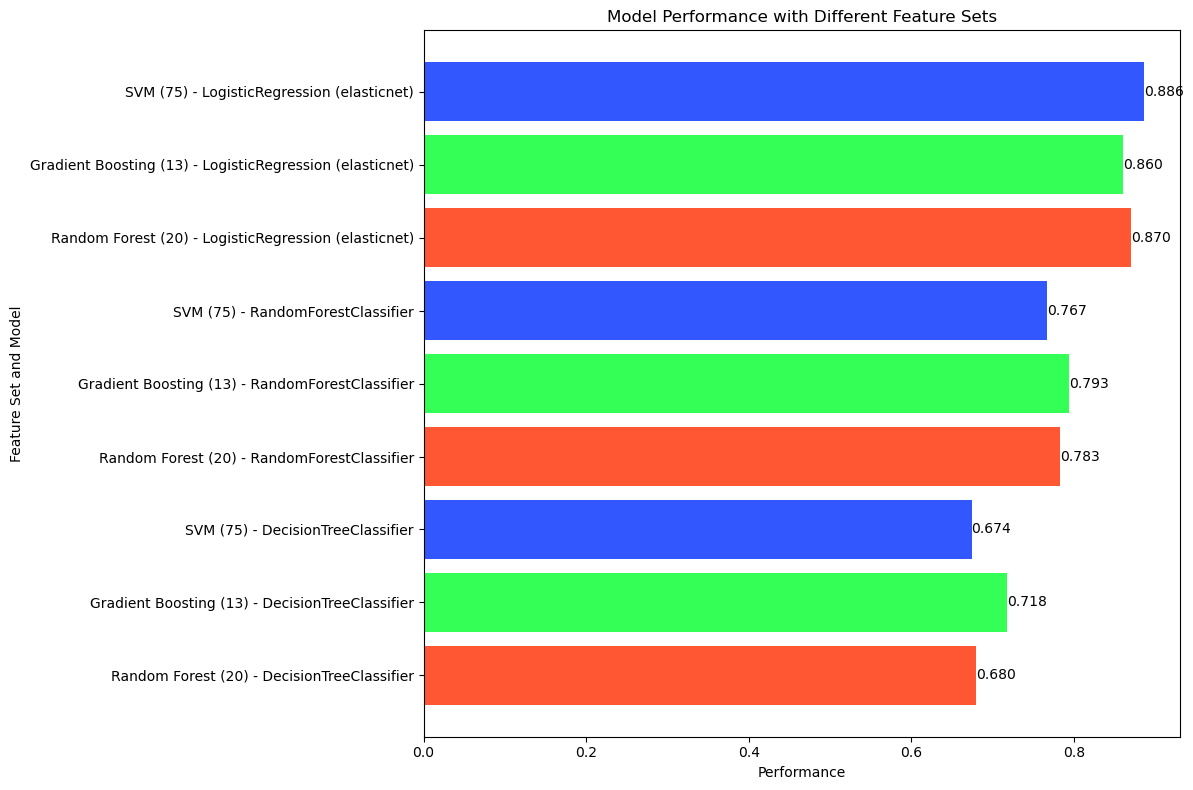

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# Daten vorbereiten
data = {
    "Feature Set": ["Random Forest (20)", "Gradient Boosting (13)", "SVM (75)"] * 3,
    "Model": ["DecisionTreeClassifier"] * 3 + ["RandomForestClassifier"] * 3 + ["LogisticRegression (elasticnet)"] * 3,
    "Performance": [0.68, 0.718, 0.674, 0.783, 0.793359, 0.767, 0.87, 0.86, 0.886]
}

df = pd.DataFrame(data)

# Bar plot erstellen
plt.figure(figsize=(12, 8))
bar = plt.barh(df.index, df['Performance'], color=['#FF5733', '#33FF57', '#3357FF', '#FF5733', '#33FF57', '#3357FF', '#FF5733', '#33FF57', '#3357FF'])

# Achsen und Titel
plt.xlabel('Performance')
plt.ylabel('Feature Set and Model')
plt.yticks(df.index, df['Feature Set'] + ' - ' + df['Model'])
plt.title('Model Performance with Different Feature Sets')

# Werte an die Balken schreiben
for index, value in enumerate(df['Performance']):
    plt.text(value, index, f'{value:.3f}', va='center')

plt.tight_layout()
plt.show()

# Rest

Updated best_params

In [ ]:
best_params = {
    "LogisticRegression (elasticnet)": {
        "regressor__C": 0.83914,
        "regressor__l1_ratio": 0.0334,
        "regressor__max_iter": 1954,
        "regressor__solver": "saga",
        "regressor__penalty": "l1"
    },
    "LogisticRegression": {
        "regressor__C": 1.623776739188721,
        "regressor__max_iter": 100,
        "regressor__penalty": "l2",
        "regressor__solver": "lbfgs"
    },
    "LightGBM": {
        "regressor__learning_rate": 0.05,
        "regressor__n_estimators": 200
    },
    "XGBoost": {
        "regressor__learning_rate": 0.05,
        "regressor__n_estimators": 200
    },
    "RandomForest": {
        "regressor__max_depth": 20,
        "regressor__n_estimators": 100
    },
    "Ridge": {
        "regressor__alpha": 10.0
    },
    "LogisticRegression (l1)": {
        "regressor__C": 0.615848211066026,
        "regressor__max_iter": 100,
        "regressor__penalty": "l1"
    },
    "DecisionTreeClassifier": {
        "regressor__criterion": "entropy",
        "regressor__max_depth": 4
    },
    "Lasso": {
        "regressor__alpha": 0.1
    },
    "RandomForestClassifier": {
        "regressor__criterion": "gini",
        "regressor__max_depth": 10,
        "regressor__n_estimators": 50
    },
    "SVR": {
        "regressor__C": 1,
        "regressor__epsilon": 0.1
    }
}

LightGBM

In [ ]:
import random
import numpy as np
from deap import base, creator, tools, algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import warnings
import pandas as pd

# Set up warnings to be ignored
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Define the fitness function and individual types
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Define the hyperparameter search space
def logistic_regression_params():
    return [
        'l2',  # penalty
        random.uniform(1e-4, 1e4),  # C
        random.choice(['lbfgs', 'newton-cg', 'sag', 'saga']),  # solver
        random.choice([100, 1000, 2500, 5000])  # max_iter
    ]

# Initialize individuals and population
toolbox = base.Toolbox()
toolbox.register("attr_params", logistic_regression_params)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.attr_params)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Define the evaluation function
def eval_lr(individual):
    penalty, C, solver, max_iter = individual
    model = LogisticRegression(
        penalty=penalty,
        C=C,
        solver=solver,
        max_iter=max_iter,
        random_state=42
    )
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    return (np.mean(scores),)

# Define the genetic algorithm operators
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=[0, 1e-4, 0, 100], up=[0, 1e4, 3, 5000], indpb=0.2)
toolbox.register("mutate_float", tools.mutPolynomialBounded, eta=1.0, low=1e-4, up=1e4, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", eval_lr)

def custom_mutation(individual, indpb):
    for i, attr in enumerate(individual):
        if i == 1:  # This is the index for 'C', which is a float
            if random.random() < indpb:
                individual[i] = random.uniform(1e-4, 1e4)
        elif i == 2:  # This is the index for 'solver'
            if random.random() < indpb:
                individual[i] = random.choice(['lbfgs', 'newton-cg', 'sag', 'saga'])
        elif i == 3:  # This is the index for 'max_iter'
            if random.random() < indpb:
                individual[i] = random.choice([100, 1000, 2500, 5000])
    return individual,

toolbox.register("mutate", custom_mutation, indpb=0.2)

# Run the genetic algorithm
def run_ga(n_gen=40, n_pop=50, n_restarts=5, improvement_threshold=1e-4):
    best_overall = None
    logbook = []
    
    for restart in range(n_restarts):
        population = toolbox.population(n=n_pop)
        best_previous = None
        no_improvement_count = 0
        
        for gen in range(n_gen):
            print(f"Generation {gen + 1}/{n_gen}, Restart {restart + 1}/{n_restarts}")
            offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
            fits = toolbox.map(toolbox.evaluate, offspring)
            
            for fit, ind in zip(fits, offspring):
                ind.fitness.values = fit
                
            population = toolbox.select(offspring, k=len(population))
            best_current = tools.selBest(population, k=1)[0]
            logbook.append((restart, gen, best_current.fitness.values[0], best_current))
            
            if best_previous is None or best_current.fitness.values[0] > best_previous.fitness.values[0] + improvement_threshold:
                best_previous = best_current
                no_improvement_count = 0
            else:
                no_improvement_count += 1
            
            if no_improvement_count >= 5:
                print(f"No significant improvement for 5 generations, stopping early.")
                break
        
        if best_overall is None or best_previous.fitness.values[0] > best_overall.fitness.values[0]:
            best_overall = best_previous
            
    return best_overall, logbook

# Run the GA and get the logbook
best_individual, logbook = run_ga()

# Save the logbook as a DataFrame
log_df = pd.DataFrame(logbook, columns=["Restart", "Generation", "Fitness", "Individual"])
log_df.to_csv('logbook_logistic_regression.csv', index=False)

# Evaluate the best model on the test set
best_params = best_individual
clf = LogisticRegression(
    penalty=best_params[0],
    C=best_params[1],
    solver=best_params[2],
    max_iter=best_params[3],
    random_state=42
)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', clf)
])
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_test, y_test)
print(f"Best individual: {best_params}")
print(f"Best fitness: {best_individual.fitness.values[0]}")
print(f"Test set accuracy: {accuracy}")

LightGBM

In [ ]:
import random
import numpy as np
from deap import base, creator, tools, algorithms
from lightgbm import LGBMRegressor
import logging
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
import warnings
import pandas as pd
import re

# Set up warnings to be ignored
warnings.filterwarnings("ignore", category=UserWarning)

# Ensure that X_train and y_train are defined
# X_train, X_test, y_train, y_test = train_test_split(...)

# Funktion, um LightGBM Warnungen zu zählen
class WarningCounter(logging.Handler):
    def __init__(self):
        super().__init__()
        self.count = 0
    
    def emit(self, record):
        if re.search("No further splits with positive gain", record.msg):
            self.count += 1

warning_counter = WarningCounter()
logging.getLogger("lightgbm").addHandler(warning_counter)

# Define the fitness function and individual types
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Define the hyperparameter search space
def lgbm_params():
    return [
        random.randint(50, 2000),  # n_estimators
        random.uniform(0.01, 1.0),  # learning_rate
        random.randint(2, 100),  # num_leaves
        random.randint(1, 100),  # min_child_samples
        random.uniform(0.01, 1.0),  # subsample
        random.uniform(0.01, 1.0)  # colsample_bytree
    ]

# Initialize individuals and population
toolbox = base.Toolbox()
toolbox.register("attr_params", lgbm_params)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.attr_params)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Define the evaluation function
def eval_lgbm(individual):
    n_estimators, learning_rate, num_leaves, min_child_samples, subsample, colsample_bytree = individual
    
    model = LGBMRegressor(
        n_estimators=int(n_estimators),
        learning_rate=learning_rate,
        num_leaves=int(num_leaves),
        min_child_samples=int(min_child_samples),
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        verbose=-1  # Verbose auf -1 setzen, um andere Ausgaben zu unterdrücken
    )
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    
    # Warnungen zählen und Penalty hinzufügen
    warning_counter.count = 0
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    warnings_penalty = warning_counter.count / 100  # Beispiel: Jede 100 Warnungen fügen 0.01 Penalty hinzu
    fitness = np.mean(scores) - warnings_penalty
    
    return (fitness,)

# Define the genetic algorithm operators
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutPolynomialBounded, low=[50, 0.01, 2, 1, 0.01, 0.01], up=[2000, 1.0, 100, 100, 1.0, 1.0], eta=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", eval_lgbm)

# Run the genetic algorithm
def run_ga(n_gen=40, n_pop=50, n_restarts=5, improvement_threshold=1e-4):
    best_overall = None
    logbook = []
    
    for restart in range(n_restarts):
        population = toolbox.population(n=n_pop)
        best_previous = None
        no_improvement_count = 0
        
        for gen in range(n_gen):
            print(f"Generation {gen + 1}/{n_gen}, Restart {restart + 1}/{n_restarts}")
            offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
            fits = toolbox.map(toolbox.evaluate, offspring)
            
            for fit, ind in zip(fits, offspring):
                ind.fitness.values = fit
                
            population = toolbox.select(offspring, k=len(population))
            best_current = tools.selBest(population, k=1)[0]
            logbook.append((restart, gen, best_current.fitness.values[0], best_current))
            
            if best_previous is None or best_current.fitness.values[0] > best_previous.fitness.values[0] + improvement_threshold:
                best_previous = best_current
                no_improvement_count = 0
            else:
                no_improvement_count += 1
            
            if no_improvement_count >= 5:
                print(f"No significant improvement for 5 generations, stopping early.")
                break
        
        if best_overall is None or best_previous.fitness.values[0] > best_overall.fitness.values[0]:
            best_overall = best_previous
            
    return best_overall, logbook

# Run the GA and get the logbook
best_individual, logbook = run_ga()

# Save the logbook as a DataFrame
log_df = pd.DataFrame(logbook, columns=["Restart", "Generation", "Fitness", "Individual"])
log_df.to_csv('logbook_lightgbm.csv', index=False)

# Evaluate the best model on the test set
best_params = best_individual
clf = LGBMRegressor(
    n_estimators=best_params[0],
    learning_rate=best_params[1],
    num_leaves=best_params[2],
    min_child_samples=best_params[3],
    subsample=best_params[4],
    colsample_bytree=best_params[5],
    verbose=-1
)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', clf)
])
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_test, y_test)
print(f"Best individual: {best_params}")
print(f"Best fitness: {best_individual.fitness.values[0]}")
print(f"Test set accuracy: {accuracy}")

In [ ]:
# Load the CSV files
logbook_lightgbm = pd.read_csv('logbook_lightgbm.csv')
logbook_logistic_regression = pd.read_csv('logbook_logistic_regression.csv')

# Find the best fitness value in both datasets
best_fitness_lightgbm = logbook_lightgbm['Fitness'].max()
best_fitness_logistic_regression = logbook_logistic_regression['Fitness'].max()

# Find the individuals with the best fitness value
best_individuals_lightgbm = logbook_lightgbm[logbook_lightgbm['Fitness'] == best_fitness_lightgbm]
best_individuals_logistic_regression = logbook_logistic_regression[logbook_logistic_regression['Fitness'] == best_fitness_logistic_regression]

# Check the counts of the best individuals
best_individuals_lightgbm_count = best_individuals_lightgbm.shape[0]
best_individuals_logistic_regression_count = best_individuals_logistic_regression.shape[0]

In [ ]:
best_individuals_lightgbm_count

In [ ]:
best_individuals_logistic_regression_count

In [ ]:
print("Best Fitness values for LightGBM:")
logbook_lightgbm['Fitness'].value_counts().head()

In [ ]:
# Logbook-Daten laden
logbook_lightgbm = pd.read_csv('logbook_lightgbm.csv')
logbook_logistic_regression = pd.read_csv('logbook_logistic_regression.csv')

# Beste Fitness-Werte finden
best_fitness_value_lightgbm = logbook_lightgbm['Fitness'].max()
best_fitness_value_logistic = logbook_logistic_regression['Fitness'].max()

# Beste Individuen finden
best_individuals_lightgbm = logbook_lightgbm[logbook_lightgbm['Fitness'] == best_fitness_value_lightgbm]
best_individuals_logistic = logbook_logistic_regression[logbook_logistic_regression['Fitness'] == best_fitness_value_logistic]

# Anzeigen der besten Individuen und deren Konfigurationen
best_individuals_lightgbm_configurations = best_individuals_lightgbm[['Generation', 'Fitness', 'Individual']]
best_individuals_logistic_configurations = best_individuals_logistic[['Generation', 'Fitness', 'Individual']]

print("Best Individuals LightGBM Configurations")
print(best_individuals_lightgbm_configurations.to_string(index=False))

print("\nBest Individuals Logistic Regression Configurations")
print(best_individuals_logistic_configurations.to_string(index=False))

Updated best_params

In [ ]:
best_params = {
    "LogisticRegression (elasticnet)": {
        "regressor__C": 0.83914,
        "regressor__l1_ratio": 0.0334,
        "regressor__max_iter": 1954,
        "regressor__solver": "saga",
        "regressor__penalty": "l1"
    },
    "LogisticRegression": {
    "regressor__penalty": "l2",
    "regressor__C": 302.5922084361755,
    "regressor__solver": "lbfgs",
    "regressor__max_iter": 100
    },
    "LightGBM": {
        "regressor__learning_rate": 0.05,
        "regressor__n_estimators": 200
    },
    "XGBoost": {
        "regressor__learning_rate": 0.05,
        "regressor__n_estimators": 200
    },
    "RandomForest": {
        "regressor__max_depth": 20,
        "regressor__n_estimators": 100
    },
    "Ridge": {
        "regressor__alpha": 10.0
    },
    "LogisticRegression (l1)": {
        "regressor__C": 0.615848211066026,
        "regressor__max_iter": 100,
        "regressor__penalty": "l1"
    },
    "DecisionTreeClassifier": {
        "regressor__criterion": "entropy",
        "regressor__max_depth": 4
    },
    "Lasso": {
        "regressor__alpha": 0.1
    },
    "RandomForestClassifier": {
        "regressor__criterion": "gini",
        "regressor__max_depth": 10,
        "regressor__n_estimators": 50
    },
    "SVR": {
        "regressor__C": 1,
        "regressor__epsilon": 0.1
    }
}

In [ ]:
def evaluate_model(pipeline, params, X_train, y_train, X_test, y_test, is_classification=True):
    pipeline.set_params(**{f'regressor__{key}': value for key, value in params.items()})
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    
    if is_classification:
        return accuracy_score(y_test, predictions)
    else:
        return mean_squared_error(y_test, predictions)

In [ ]:
def clean_params(params):
    # Entfernt 'regressor__' Präfix aus den Parametern
    return {key.replace("regressor__", ""): value for key, value in params.items()}

In [ ]:
results = []

# Iterate through best_params and evaluate each model
for model_name, params in best_params.items():
    cleaned_params = clean_params(params)
    
    if model_name.startswith("LogisticRegression (elasticnet)"):
        penalty = 'elasticnet'
        cleaned_params.pop('penalty', None)
        cleaned_params.pop('solver', None)  # Remove solver if it exists in cleaned_params
        model = LogisticRegression(
            penalty=penalty,
            solver='saga',
            **cleaned_params
        )
        is_classification = True
    elif model_name.startswith("LogisticRegression"):
        penalty = cleaned_params.pop('penalty', 'l2')
        solver = cleaned_params.pop('solver', 'lbfgs')  # Remove solver if it exists in cleaned_params
        if penalty == 'l1' and solver != 'liblinear':
            solver = 'liblinear'
        model = LogisticRegression(
            penalty=penalty,
            solver=solver,
            **cleaned_params
        )
        is_classification = True
    elif model_name == "LightGBM":
        model = LGBMRegressor(**cleaned_params)
        is_classification = False
    elif model_name == "XGBoost":
        model = XGBRegressor(**cleaned_params)
        is_classification = False
    elif model_name == "RandomForest":
        model = RandomForestRegressor(**cleaned_params)
        is_classification = False
    elif model_name == "Ridge":
        model = Ridge(**cleaned_params)
        is_classification = False
    elif model_name == "Lasso":
        model = Lasso(**cleaned_params)
        is_classification = False
    elif model_name == "DecisionTreeClassifier":
        model = DecisionTreeClassifier(**cleaned_params)
        is_classification = True
    elif model_name == "RandomForestClassifier":
        model = RandomForestClassifier(**cleaned_params)
        is_classification = True
    elif model_name == "SVR":
        model = SVR(**cleaned_params)
        is_classification = False
    else:
        raise ValueError(f"Model {model_name} is not recognized.")
    
    # Evaluate the model using the pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    score = evaluate_model(pipeline, cleaned_params, X_train, y_train, X_test, y_test, is_classification)
    results.append({"Model": model_name, "Score": score})
    print(f"{model_name} Score: {score}")

# Ergebnisse in DataFrame umwandeln
results_df3 = pd.DataFrame(results)

# DataFrame anzeigen
results_df3 

lightgbm again..

In [ ]:
import random
import numpy as np
from deap import base, creator, tools, algorithms
from lightgbm import LGBMRegressor
import logging
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import warnings
import pandas as pd
import re

# Funktion, um LightGBM Warnungen zu zählen
class WarningCounter(logging.Handler):
    def __init__(self):
        super().__init__()
        self.count = 0
    
    def emit(self, record):
        if re.search("No further splits with positive gain", record.msg):
            self.count += 1

warning_counter = WarningCounter()
logging.getLogger("lightgbm").addHandler(warning_counter)

# Dictionary zur Zwischenspeicherung der Ergebnisse
results_cache = {}

def eval_lgbm(individual):
    # Konvertiere das Individuum in einen Hashable Typ für das Dictionary
    key = tuple(individual)
    
    # Überprüfe, ob das Ergebnis bereits im Cache ist
    if key in results_cache:
        return results_cache[key]
    
    n_estimators = max(1, int(individual[0]))
    learning_rate = max(0.001, individual[1])
    num_leaves = max(2, int(individual[2]))
    min_child_samples = max(1, int(individual[3]))
    subsample = min(max(individual[4], 0.01), 1.0)
    colsample_bytree = min(max(individual[5], 0.01), 1.0)
    
    model = LGBMRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        num_leaves=num_leaves,
        min_child_samples=min_child_samples,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        verbose=-1
    )
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    
    warning_counter.count = 0
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')  # cv wieder auf 5 gesetzt
    fitness = np.mean(scores)
    
    # Speichere das Ergebnis im Cache
    results_cache[key] = (fitness,)
    
    return (fitness,)

# GA Setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_int", random.randint, 50, 2000)
toolbox.register("attr_float", random.uniform, 0.01, 1.0)

toolbox.register("individual", tools.initCycle, creator.Individual, 
                 (toolbox.attr_int, toolbox.attr_float, toolbox.attr_int, toolbox.attr_int, toolbox.attr_float, toolbox.attr_float), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", eval_lgbm)

def run_ga(n_gen=40, n_pop=50, n_restarts=2, improvement_threshold=1e-4):
    best_overall = None
    logbook = []
    
    for restart in range(n_restarts):
        population = toolbox.population(n=n_pop)
        fitnesses = list(map(toolbox.evaluate, population))
        for ind, fit in zip(population, fitnesses):
            ind.fitness.values = fit

        best_in_restart = None
        no_improvement_count = 0
        
        for gen in range(n_gen):
            print(f"Generation {gen+1}/{n_gen}, Restart {restart+1}/{n_restarts}")
            offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
            fits = list(map(toolbox.evaluate, offspring))
            for fit, ind in zip(fits, offspring):
                ind.fitness.values = fit

            population = toolbox.select(offspring, k=len(population))
            best_in_gen = tools.selBest(population, 1)[0]
            logbook.append((restart, gen, best_in_gen.fitness.values[0], best_in_gen))
            
            if not best_in_restart or best_in_gen.fitness.values[0] > best_in_restart.fitness.values[0]:
                best_in_restart = best_in_gen
                no_improvement_count = 0
            else:
                no_improvement_count += 1
                
            if no_improvement_count >= 5 and improvement_threshold > 0:
                print("No significant improvement for 5 generations, stopping early.")
                break
            
            if best_overall is None or best_in_restart.fitness.values[0] > best_overall.fitness.values[0]:
                best_overall = best_in_restart

    return best_overall, logbook

best_individual, logbook = run_ga()
log_df = pd.DataFrame(logbook, columns=["Restart", "Generation", "Fitness", "Individual"])
log_df.to_csv('logbook_lightgbm_optimized.csv', index=False)

In [ ]:
# Logbook-Daten laden
logbook_lightgbm = pd.read_csv('logbook_lightgbm_optimized.csv')

# Beste Fitness-Werte finden
best_fitness_value_lightgbm = logbook_lightgbm['Fitness'].max()

# Beste Individuen finden
best_individuals_lightgbm = logbook_lightgbm[logbook_lightgbm['Fitness'] == best_fitness_value_lightgbm]

# Anzeigen der besten Individuen und deren Konfigurationen
best_individuals_lightgbm_configurations = best_individuals_lightgbm[['Generation', 'Fitness', 'Individual']]

print("Best Individuals LightGBM Configurations")
print(best_individuals_lightgbm_configurations.to_string(index=False))

# New best_params

In [18]:
best_params = {
    "LogisticRegression (elasticnet)": {
        "regressor__C": 0.83914,
        "regressor__l1_ratio": 0.0334,
        "regressor__max_iter": 1954,
        "regressor__solver": "saga",
        "regressor__penalty": "l1"
    },
    "LogisticRegression": {
    "regressor__penalty": "l2",
    "regressor__C": 302.5922084361755,
    "regressor__solver": "lbfgs",
    "regressor__max_iter": 100
    },
    "LightGBM": {
    "regressor__n_estimators": 73,
    "regressor__learning_rate": 0.598051462131909,
    "regressor__num_leaves": 6,
    "regressor__min_child_samples": 1,
    "regressor__subsample": 0.22828096007057125,
    "regressor__colsample_bytree": 0.937954695493283
    },
    "XGBoost": {
        "regressor__learning_rate": 0.05,
        "regressor__n_estimators": 200
    },
    "RandomForest": {
        "regressor__max_depth": 20,
        "regressor__n_estimators": 100
    },
    "Ridge": {
        "regressor__alpha": 10.0
    },
    "LogisticRegression (l1)": {
        "regressor__C": 0.615848211066026,
        "regressor__max_iter": 100,
        "regressor__penalty": "l1"
    },
    "DecisionTreeClassifier": {
        "regressor__criterion": "entropy",
        "regressor__max_depth": 4
    },
    "Lasso": {
        "regressor__alpha": 0.1
    },
    "RandomForestClassifier": {
        "regressor__criterion": "gini",
        "regressor__max_depth": 10,
        "regressor__n_estimators": 50
    },
    "SVR": {
        "regressor__C": 1,
        "regressor__epsilon": 0.1
    }}

In [ ]:
results = []

# Iterate through best_params and evaluate each model
for model_name, params in best_params.items():
    cleaned_params = clean_params(params)
    
    if model_name.startswith("LogisticRegression (elasticnet)"):
        penalty = 'elasticnet'
        cleaned_params.pop('penalty', None)
        cleaned_params.pop('solver', None)  # Remove solver if it exists in cleaned_params
        model = LogisticRegression(
            penalty=penalty,
            solver='saga',
            **cleaned_params
        )
        is_classification = True
    elif model_name.startswith("LogisticRegression"):
        penalty = cleaned_params.pop('penalty', 'l2')
        solver = cleaned_params.pop('solver', 'lbfgs')  # Remove solver if it exists in cleaned_params
        if penalty == 'l1' and solver != 'liblinear':
            solver = 'liblinear'
        model = LogisticRegression(
            penalty=penalty,
            solver=solver,
            **cleaned_params
        )
        is_classification = True
    elif model_name == "LightGBM":
        model = LGBMRegressor(**cleaned_params)
        is_classification = False
    elif model_name == "XGBoost":
        model = XGBRegressor(**cleaned_params)
        is_classification = False
    elif model_name == "RandomForest":
        model = RandomForestRegressor(**cleaned_params)
        is_classification = False
    elif model_name == "Ridge":
        model = Ridge(**cleaned_params)
        is_classification = False
    elif model_name == "Lasso":
        model = Lasso(**cleaned_params)
        is_classification = False
    elif model_name == "DecisionTreeClassifier":
        model = DecisionTreeClassifier(**cleaned_params)
        is_classification = True
    elif model_name == "RandomForestClassifier":
        model = RandomForestClassifier(**cleaned_params)
        is_classification = True
    elif model_name == "SVR":
        model = SVR(**cleaned_params)
        is_classification = False
    else:
        raise ValueError(f"Model {model_name} is not recognized.")
    
    # Evaluate the model using the pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    score = evaluate_model(pipeline, cleaned_params, X_train, y_train, X_test, y_test, is_classification)
    results.append({"Model": model_name, "Score": score})
    print(f"{model_name} Score: {score}")

# Ergebnisse in DataFrame umwandeln
results_df4 = pd.DataFrame(results)

# DataFrame anzeigen
results_df4

# Artificial neural networks (first try, not used)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ParameterGrid, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from scikeras.wrappers import KerasRegressor
import shap
import tensorflow as tf
from tqdm import tqdm

# Sicherstellen, dass Eager Execution aktiviert ist
# tf.config.run_functions_eagerly(True)

# Funktion zum Erstellen des Keras-Modells
def create_model():
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse')
    return model

# Beispielhafte Feature-Namen generieren
feature_names = [f'Feature {i}' for i in range(X_train.shape[1])]

# Liste der Modelle und Parameter
models_and_params = [
    ('Neural Network', KerasRegressor(model=create_model, verbose=0), {
        'regressor__batch_size': [32],
        'regressor__epochs': [50]
    })
]

results = []

# Verwende eine Stichprobe der Daten für die Hyperparameter-Optimierung
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=0.1, random_state=42)

# Loop through models and perform grid search
for name, model, param_grid in models_and_params:
    print(f"Optimizing {name}...")

    pipeline = Pipeline([
        ('preprocessor', StandardScaler()),
        ('regressor', model)
    ])

    # Initialize the parameter grid
    param_list = list(ParameterGrid(param_grid))

    best_params = None
    best_score = float('inf')

    # Progress Bar für die Grid Search
    for params in tqdm(param_list, desc=f"Grid Search for {name}"):
        try:
            pipeline.set_params(**params)
            scores = cross_val_score(pipeline, X_train_sample, y_train_sample, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
            mean_score = -scores.mean()

            if mean_score < best_score:
                best_score = mean_score
                best_params = params
        except Exception as e:
            print(f"Error with params {params}: {e}")

    # Train the best model on the full training data
    if best_params is not None:
        pipeline.set_params(**best_params)
        pipeline.fit(X_train, y_train)

        y_pred = pipeline.predict(X_test)
        test_mse = mean_squared_error(y_test, y_pred)

        results.append({
            'model': name,
            'best_params': best_params,
            'cv_mse': best_score,
            'test_mse': test_mse
        })

        # Feature-Wichtigkeit mit GradientExplainer bestimmen
        X_train_summary = shap.sample(X_train, 100).to_numpy()  # Reduziere die Anzahl der Hintergrunddaten und konvertiere zu NumPy
        explainer = shap.GradientExplainer(pipeline.named_steps['regressor'].model_, X_train_summary)
        
        # Berechnung der SHAP-Werte
        shap_values = explainer.shap_values(X_test.to_numpy()[:100])

        # Überprüfen der Struktur der SHAP-Werte
        print(f"SHAP values shape: {np.array(shap_values).shape}")
        
        # SHAP-Werte visualisieren
        shap.summary_plot(shap_values, X_test.to_numpy()[:100], feature_names=feature_names)

        # Feature-Wichtigkeit mit Permutation Importance bestimmen
        from sklearn.inspection import permutation_importance
        perm_importance = permutation_importance(pipeline.named_steps['regressor'], X_test.to_numpy(), y_test, n_repeats=10, random_state=42)

        feature_importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': perm_importance.importances_mean
        }).sort_values(by='Importance', ascending=False)

        print(feature_importance_df)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ParameterGrid, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasRegressor
import shap
from sklearn.utils import resample

# Funktion zum Erstellen des Keras-Modells
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse')
    return model

# Beispielhafte Feature-Namen generieren
feature_names = [f'Feature {i}' for i in range(X_train.shape[1])]

# Liste der Modelle und Parameter
models_and_params = [
    ('Neural Network', KerasRegressor(model=create_model, verbose=0, callbacks=[EarlyStopping(monitor='loss', patience=3)]), {
        'regressor__batch_size': [32],
        'regressor__epochs': [50]
    })
]

results = []

# Verwende eine Stichprobe der Daten für die Hyperparameter-Optimierung
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=0.1, random_state=42)

# Loop through models and perform grid search
for name, model, param_grid in models_and_params:
    print(f"Optimizing {name}...")

    pipeline = Pipeline([
        ('preprocessor', StandardScaler()),
        ('regressor', model)
    ])

    # Initialize the parameter grid
    param_list = list(ParameterGrid(param_grid))

    best_params = None
    best_score = float('inf')

    for params in param_list:
        try:
            pipeline.set_params(**params)
            scores = cross_val_score(pipeline, X_train_sample, y_train_sample, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
            mean_score = -scores.mean()

            if mean_score < best_score:
                best_score = mean_score
                best_params = params
        except Exception as e:
            print(f"Error with params {params}: {e}")

    # Train the best model on the full training data
    if best_params is not None:
        pipeline.set_params(**best_params)
        pipeline.fit(X_train, y_train)

        y_pred = pipeline.predict(X_test)
        test_mse = mean_squared_error(y_test, y_pred)

        results.append({
            'model': name,
            'best_params': best_params,
            'cv_mse': best_score,
            'test_mse': test_mse
        })

        # Feature-Wichtigkeit mit effizientem SHAP-Explainer bestimmen
        explainer = shap.DeepExplainer(pipeline.named_steps['regressor'].model_, X_train[:100])  # Verwende einen kleineren Datensatz für den Explainer
        shap_values = explainer.shap_values(X_test[:100])

        # SHAP-Werte visualisieren
        shap.summary_plot(shap_values, X_test[:100], feature_names=feature_names)

        # Feature-Wichtigkeit mit Permutation Importance bestimmen
        from sklearn.inspection import permutation_importance
        perm_importance = permutation_importance(pipeline.named_steps['regressor'], X_test, y_test, n_repeats=10, random_state=42)

        feature_importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': perm_importance.importances_mean
        }).sort_values(by='Importance', ascending=False)

        print(feature_importance_df)